# Data Mining Versuch Music Clustering
* Autor: Prof. Dr. Johannes Maucher
* Datum: 16.10.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Musikdateien
* Transcodierung von mp3 zu wav 
* Extraktion von Merkmalen in Musikdateien (Feature Extraction)
* Optimierung mit dem genetischen Algorithmus
* Selektion der aussagekräftigsten Merkmale (Feature Selection)
* Clustering von Musikfiles (automatische Playlistgenerierung)


## Vor dem Versuch zu klärende Fragen

### Transcodierung von MP3 nach WAV und Merkmalsextraktion
In diesem Versuch wird der MP3 Decoder [mpg123](http://www.mpg123.de/) eingesetzt. Installieren und testen sie diesen Decoder vor dem Versuch auf ihrem Rechner. Machen Sie sich zunächst mit dem in Kapitel [Gegebene Module zur Transcodierung und Feature Extraction](#Gegebene-Module-zur-Transcodierung-und-Feature-Extraction) aufgeführten Code vertraut. Versuchen Sie Funktion und Ablauf dieses Programms zu verstehen und beantworten Sie folgende Fragen.

1. Was versteht man unter den statistischen Größen _Mittelwert, Standardabweichung, Skewness und Kurtosis_?
2. Was beschreibt die Fourier-Transformierte eines zeitlich ausgedehnten Signals?
3. Mit welcher Samplingrate werden die WAV Dateien abgetastet?
4. Insgesamt werden 42 Merkmale pro Musiksequenz extrahiert. Beschreiben Sie kurz diese Merkmale



#### 1.)
##### Mittelwert:
Der Mittelwert (arithmetisches Mittel) beschreibt den empirischen Durchschnitt einer Variable-
Die Merkmalssumme aller Merkmalsausprägungen wird dividiert durch die Anzahl der Merkmalsträger.
Das Resultat ist abhängig von der Größe/Einheit der Mermalsträger.

##### Standardabweichung
Die Standardabweichung ist eine Kennzahl einer Stichprobe. Die Standardabweichung ist ein Streuungsmaß und beschreibt die mittlere quadratische Abweichung der einzelnen Messwerte vom Mittelwert. Das Resultat der Standardabweichung ist ebenfalls abhängig von den Eingabegrößen. Je größer die Standardabweichung desto stärker sind die Werte gestreut.

##### Skewness
Die Skewness (Schiefheit) ist eine Kennzahl, welche die Art und die Stärke der Asymmetrie einer Wahrscheinlichkeitsverteilung beschreibt. Die Kennzahl zeigt an, ob und wie stark eine Verteilung vom Mittelwert nach rechts oder links abweicht. Jede nicht symmetrische Verteilung ist schief.

##### Kurtosis
Die Kurtosis (Wölbung) ist eine Kennzahl für die Steilheit einer Wahrscheinlichkeitsfunktion. Verteilungen mit geringer Wölbung streuen relativ gleichmäßig (Häufigkeit oft, Wertabweichung schwach). Bei Verteilungen mit hoher Wölbung resultiert die Streuung mehr aus extremen, aber seltenen Ereignissen (Häufigkeit selten, Wertabweichung stark).

#### 2.)
Die Fourier-Transformierte zerlegt ein kontinuierliches aperiodosches Signal in ein kontinuierliches Spektrum. Mp3 oder wav Dateien haben kein kontinuierliches sondern ein diskretes Signal. Daher muss bei ihnen die diskrete Fourier-Transformation angewendet werden. Die diskrete Fourier-Transformation bildet ein diskretes endliches Signal (mp3/wav Datei), das periodisch fortgesetzt wird, auf ein diskretes, periodisches Frequenzspektrum ab. In einem Frequenzspektrum lässt sich der Anteil der einzelnen Frequenzen am gesamten Signal ablesen. Das Frequenzspektrum liefert wichtige Informationen über die Zusammensetzung des Signals.

#### 3.)
Die .wav Dateien werden mit 10kHz abgetastet.

#### 4.)
- "amp1mean"
- "amp1std"
- "amp1skew"
- "amp1kurt"
- "amp1dmean"
- "amp1dstd"
- "amp1dskew"
- "amp1dkurt"
- "amp10mean"
- "amp10std"
- "amp10skew"
- "amp10kurt"
- "amp10dmean"
- "amp10dstd"
- "amp10dskew"
- "amp10dkurt"
- "amp100mean"
- "amp100std"
- "amp100skew"
- "amp100kurt"
- "amp100dmean"
- "amp100dstd"
- "amp100dskew"
- "amp100dkurt"
- "amp1000mean"
- "amp1000std"
- "amp1000skew"
- "amp1000kurt"
- "amp1000dmean"
- "amp1000dstd"
- "amp1000dskew"
- "amp1000dkurt"
- "power1"
- "power2"
- "power3"
- "power4"
- "power5"
- "power6"
- "power7"
- "power8"
- "power9"
- "power10"

### Matching der Teilsequenzen

1. Nachdem für jedes Musikstück die beiden Teilsequenzen in Form der extrahierten Merkmale vorliegen: Wie kann die Ähnlichkeit zwischen Teilsequenzen ermittelt werden?
2. Welche Numpy- bzw. Scipy-Module können Sie für die Bestimmung der Ähnlichkeit zwischen Teilsequenzen einsetzen?

##### 1.)
In dem mit einem passenden Ähnlichkeitsmaß (euklidische Distanz, Pearson-Korrelation) die Ähnlichkeit zwischen den Merkmalsvektoren bestimmt wird.

##### 2.)
- Für die euklidische Distanz kann das Numpy-Modul np.linalg.norm verwendet werden.
- Für die Perason-Korrelation kann das Scipy-Modul scipy.stats mit der Funktion pearsonr() verwendet werden.

### Genetischer Algorithmus für die Merkmalsselektion

1. Beschreiben Sie die Prozesschritte im genetischen Algorithmus [Genetischer Algorithmus](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html)
2. In diesem Versuch wird davon ausgegangen, dass Merkmale dann gut sind, wenn durch sie die erste Teilsequenz eines Musikstücks durch einen ähnlichen Vektor wie die jeweils zweite Teilsequenz beschrieben wird. Wie kann mit dieser Annahme der genetische Algorithmus für die Merkmalsselektion angewandt werden. Unter Merkmalsselektion versteht man allgemein die Suche nach den $r$ besten Merkmalen aus einer Menge von insgesamt $R$ Merkmalen. In diesem Versuch werden initial $R=42$ Merkmale extrahiert, aus denen dann die besten $r<R$ Merkmale zu bestimmen sind. Überlegen Sie hierfür speziell wie die Fitnessfunktion, die Kreuzung und die Mutation zu realisieren sind.


##### 1.)
Genetische Algorithmen sind Verfahren welche einen definierten Suchraum nach einer geeigneten Lösung durchsuchen. Dabei wird die Evolution aus der Natur simuliert, welche ebenfalls Lösungen für Probleme hervorbringt. Tiere, Pflanzen und der Mensch haben es der Evolution zu verdanken, dass sich ihre Körper an herausfordernde Lebensräume anpassen konnten. Der wichtigste Baustein der Evolution ist das Darwin'sche Survival of the Fittest. Gene welche ein Merkmal codieren, welches den vorzeitigen oder frühen Tod eines Individuums verhindern, tragen dazu bei, dass sich das Individuum überhaupt und auf lange Sicht auch öfter fortpflanzen
kann. Fortpflanzung generell bedeutet die Weitergabe dieser Gene. Gene welche ein Merkmal codieren, welche das Individuum anfällig für Feinde oder den Lebensraum machen, tragen dazu bei, dass das Individuum früher stirbt und sich nicht fortpflanzen kann. Somit sind starke Gene welche das Individuum an seinen Lebensraum anpassen eine Lösung für die Probleme welche der
Lebensraum an sie stellt. Der Tod durch Feinde, Nahrungsmangel oder sonstige Bedingungen stellt eine Form der Bewertung dieses Lösungsansatzes dar. Somit sind die Lebensdauer und die Populationsgrößen Bewertungsparameter für diese Lösungsansätze. 

Dieses Modell kann in die Welt der Informatik übertragen werden um geeignete Lösungen für große Suchräume zu finden. Große Suchräume zeichnen sich dadurch aus, dass eine komplette Exploration des Suchraumes auch mit schnellen modernen Computern nicht in einem endlichen oder akzeptablen Zeitraum möglich ist. Genetische Algorithmen suchen nur ausgewählte Teile des Suchraumes
ab, wobei jedoch die Gefahr besteht, dass der Algorithmus in lokalen Minima stecken bleibt. Um das Modell in die Informatik zu übertragen können die gleichen Begriffe wie in der Biologie genutzt werden, jedoch mit abgewandelter Bedeutung. Ein
einzelnes Individuum ist ein einzelner Lösungsansatz. Lösungsansätze besitzen Parameter, welche beliebig als Zahlen, Buchstaben oder auf sonstige Weise codiert werden können. Jeder Parameter eines Lösungsansatzes ist ein Gen. Gene können als binäre Arrays oder Strings codiert werden. Um ein Individuum zu bewerten wird eine sogenannte Fitness-Funktion benötigt. Diese Funktion ordnet jedem Individuum, d.h. jedem Lösungsansatz, einen Fitness-Wert zu. Der Fitness-Wert sagt aus, wie gut der Lösungsansatz funktioniert. Je höher der Fitness-Wert ist desto besser ist der dazugehörige Lösungsansatz. Das Ziel des genetischen Algorithmus ist es Individuen mit einem maximalen Fitness-Wert zu kreieren. Diese Kreation geschieht durch Paarungen von Individuen in Generationen. Die erste Generation ist der Startpunkt des Vorgangs und muss manuell erstellt
werden. Diese Erstellung kann beispielsweise eine Sammlung bisher bekannter akzeptabler Individuen für das Problem sein. Oder alle Individuen der ersten Generation werden mit zufälligen Genen erstellt. Um den Suchraum nicht schon von der ersten Generation an zu beschränken, bietet es sich an eine Mischung von bekannten und zufällig erstellten Lösungsansätzen in die erste Generation mitaufzunehmen. Die erste Generation bildet nach ihrer Erstellung die Gesamtpopulation der Individuen ab. Nach der Erstellung wird die Population der ersten Generation evaluiert, d.h. für jedes Individuum wird der Fitness-Wert ermittelt. 

##### Elitismus & Ausmerzung (optional)
Durch Elitismus, Ausmerzung und Fortpflanzung entsteht aus der ersten Generation die zweite Generation. Elitismus und Ausmerzung (Elitism & Culling) ist ein optionales Verfahren, welches die besten Individuen einer Generation vor dem Tod nach der Fortpflanzung bewahrt und die Individuen mit den niedrigsten Fitness-Werten vorzeitig beseitigt, bevor diese sich fortpflanzen können. Elitismus und Ausmerzung kann auf einen Anteil an der Gesamtpopulation angewendet werden. Beispielsweise
würden bei einer Elitismus- und Ausmerzungsrate von 5% bei einer Populationsgröße von 1000 Individuen die 50 besten Individuen direkt in die zweite Generation aufgenommen werden. Die 50 schlechtesten Individuen dürften sich nicht fortpflanzen und werden gelöscht. Nachdem Elitismus und Ausmerzung stattgefunden haben kommt es zur Fortpflanzung. 

#### Die Fortpflanzung benutzt drei Operatoren: Selektion, Kreuzung und Mutation.

##### Selektion 
Der Selektor wählt Individuen für die Fortpflanzung aus. Die Wahrscheinlichkeit, dass ein Individuum für die Fortpflanzung ausgewählt wird ist abhängig von seinem Fitness-Wert. Dieses Auswahlverfahren kann mit einem Glücksrad verdeutlicht werden. Jedes Individuum bekommt ein Kreisabschnitt auf dem Glücksrad zugewiesen. Die Größe dieses Abschnitts ist proportional zum Fitness-Wert des Individuums. Das Glücksrad wählt somit häufiger Individuen mit hohem Fitness-Wert aus. Individuen mit hohem Fitness-Wert können sich so mehrfach fortpflanzen und mehrere Nachkommen innerhalb einer Generation erzeugen.
Hat der Selektor zwei Individuen für die Fortpflanzung ausgewählt, beginnt die Kreuzung der Gene.

##### Kreuzung
Bei der Kreuzung werden auf dem Gen von Individuum 1 zwei zufällige Stellen ausgewählt und der dazwischenliegende Abschnitt durch die entsprechenden Werte des Gens von Individuum 2 ersetzt. Nachdem das Gen beider Individuen gekreuzt wurden ist ein neues Individuum mit einem eigenständigen Satz von Genen entstanden. Bei der Kreuzung ist es wichtig, ein Kreuzungsverfahren einzusetzten, welches valide Nachkommen produziert.

##### Mutation
Mit diesem neuen Individuum wird der Prozess der Mutation durchgeführt. Dabei wird ebenfalls durch alle Gene des neuen Individuums iteriert. Bei der Iteration durch die binären Genkette, wird an jeder Stelle mit einer festgelegten Mutationswahrscheinlichkeit der binäre Wert geändert. Eine Mutationswahrscheinlichkeit von 1% bedeutet, dass an jeder Stelle eines Gens mit einer Wahrscheinlichkeit von 1% der binäre Wert umgekehrt wird. Die Mutation stellt die Vielfalt innerhalb der Population sicher und beugt der Konvergenz des Verfahrens in lokalen Minima vor. 

##### Loop
Der Selektor wählt solange Individuen für die Fortpflanzung aus, bis die gewünschte Populationsgröße der nächsten Generation erreicht wurde.
Nachdem die neue Generation komplett ist, beginnt der Prozess von Elitismus, Ausmerzung, Selektion, Kreuzung und Mutation von vorne bis die nächste Generation erzeugt wurde. Das Verfahren tendiert aufgrund des Selektors dazu gute Lösungen zu kombinieren und durch Mutation neue Lösungsansätze zu kreieren. Die dadurch entstehenden neuen Lösungen können höhere Fitness-Werte erreichen wie die Lösungen der Vorgängergeneration. Die Erzeugung neuer Generationen stoppt, wenn ein Individuum erzeugt wurde, dessen Fitness-Wert einen zuvor gewünschten Grenzwert erfüllt beziehungsweise überschreitet oder die maximale Anzahl an Iterationen erreicht wurde.

#### 2.)

##### Fitnessfunktion
Zur Berechnung der Fitnessfunktion der einzelnen Individuen wird in der Implementation der mittlere Rang verwendet. Von jedem Lied wird mit der Teilsequenz 1 zu jedem anderen Lied (auch sich selbst) die Ähnlichkeit des reduzierten Feature-Vektors zur Teilsequenz 2 ermittelt. Anschließend wird ein für jede Teilsequenz 1 ein Ähnlichkeits-Ranking erstellt, welchen Rang die Teilsequenz 2 desselben Liedes belegt. Je ähnlicher die Teilsequenz 2 der Teilsequenz 1 aufgrund der verwendeten Features ist, desto niedriger ihr Rang. Ein Rang von 0 bedeutet, dass die Teilsequenz 2 des Liedes am ähnlichsten zur Teilsequenz 1 desselben Liedes war. Anschließend wird für jedes Lied der Rang der dazugehörigen Teilsequenz ermittelt, aus diesen Werten wird der Mittelwert berechnet. Dies ist der mittlere Rang welcher als Fitness-Wert zurückgegeben wird.

##### Kreuzung
Bei der Kreuzung ist es wichtig, dass valide Nachkommen generiert werden. Da für feste Anzahlen von Features Lösungen gesucht werden, ist es wichtig dass diese Feature-Anzahl konstant bleibt. Daher können die Segmente nicht beliebig ausgetauscht werden, da sich sonst die Anzahl der Features des Individuums erhöht oder reduziert. Die Implementierung sucht zufällige Segmente auf Individuum 1 heraus und vergleicht die Summe der gesetzten Bits (= aktivierten Features) mit der Summe der aktivierten Features des Individuums 2. Wenn bei beiden Individuum die Summe der aktivierten Features gleich ist, können die Segmente ausgetauscht werden. Ein weiteres Kriterium ist die Mindestlänge der Segmente - das Segment wird nur ausgetauscht wenn die Segmentlänge mindestens 10% der Gesamtlänge des Gens entspricht. Anderenfalls wird das Segment verworfen und es wird nach einem neuen Segment gesucht. Somit bleibt die Anzahl der aktivierten Features über alle Generationen konstant.

##### Mutation
Bei der Mutation muss ebenfalls darauf geachtet werden, dass valide Nachkommen generiert werden. Die Implementierung iteriert durch alle 42-Feature-Bits. Bei jedem Bit wird gewürfelt und mit einer konfigurierbaren Wahrscheinlichkeit das Feature-Bit geflippt. Ein einfacher Bit-Flip im Gen würde die Anzahl der aktivierten Features jedoch um 1 verändern. Daher muss das geflippte Bit ausgeglichen werden. Dazu wird ein zufälliges anderes Bit gesucht, welches die entsprechende Aktion des vorherigen Bit-Flips ausgleichen kann, damit die Anzahl der aktivierten Features konstant bleibt.

### Clustering und Playlistgenerierung

1. Wie kann mit einem hierarchischen Clustering der Musikfiles eine Menge von Playlists erzeugt werden, so dass innerhalb einer Playlist möglichst ähnliche Titel zu finden sind?

Nach der Durchführung eines hierarchischen Clusterings befinden sich ähnliche Songs in den gleichen Clustern. Es kann ein Grenzwert Parameter mit der maximalen Distanz innerhalb einer Playlist festgelegt werden. Zur Generierung einer Playlist kann bei dem Lied mit dem geringsten sample index innerhalb eines Clusters begonnen werden. Anschließend wird das nächste Lied mit der geringsten Distanz ausgewählt. Dies wird solange wiederholt, bis ein hinzuzufügendes Lied die maximale Distanz zum ersten Lied überschreiten würde.

# Durchführung
## Gegebene Module zur Transcodierung und Feature Extraction
Mit dem in diesem Abschnitt gegebenen Code werden die im Unterverzeichnis _BandCollection_ befindlichen mp3-Files zunächst in wave decodiert. Danach werden aus den wave Dateien Audiomerkmale erhoben.

Von jedem Musikstück werden zwei disjunkte Teilsequenzen erhoben und von beiden Teilsequenzen jeweils ein Merkmalsvektor gebildet. Der Grund hierfür ist: Für die später folgende Bestimmung der wichtigsten Merkmale (Merkmalsselektion mit dem genetischen Algorithmus), wird angenommen dass Merkmale dann gut sind, wenn die aus ihnen gebildeten Merkmalsvektoren für Teilsequenzen des gleichen Musikstücks nahe beieinander liegen und die Merkmalsvektoren von Teilsequenzen unterschiedlicher Musikstücke weiter voneinander entfernt sind. In der Merkmalsselektion werden dann die Merkmale als relevant erachtet, für die diese Annahme zutrifft. 

**Aufgaben:**

1. Stellen Sie im unten gegebenen Code die Verzeichnisse für Ihre Musikdateien (aktuell Unterverzeichnis _BandCollection_) und für den Ort Ihres _mpg123_ Decoders richtig ein.
2. Die verwendete Musiksammlung sollte mindestens 5 verschiedene Interpreten möglichst unterschiedlicher Genres enthalten. Von jedem Interpret sollten mehrere Titel (evtl. ein ganzes Album) enthalten sein.
3. Führen Sie den in diesem Abschnitt gegebenen Programmcode zur Audiofeature-Extraction aus. Damit werden für alle Musiksequenzen jeweils 42 Merkmale extrahiert. Die extrahierten Merkmalsvektoren der jeweils ersten Sequenz werden in das File _FeatureFileTrainingAllList1.csv_ geschrieben, die der zweiten Teilsequen in das File _FeatureFileTestAllList2.csv_. 


In [ ]:
import subprocess
import wave
import struct
import numpy
import os
import pandas as pd

numpy.set_printoptions(precision=2,suppress=True)

#Names of features extracted in this module
FeatNames=["amp1mean","amp1std","amp1skew","amp1kurt","amp1dmean","amp1dstd","amp1dskew","amp1dkurt","amp10mean","amp10std",
           "amp10skew","amp10kurt","amp10dmean","amp10dstd","amp10dskew","amp10dkurt","amp100mean","amp100std","amp100skew",
           "amp100kurt","amp100dmean","amp100dstd","amp100dskew","amp100dkurt","amp1000mean","amp1000std","amp1000skew",
           "amp1000kurt","amp1000dmean","amp1000dstd","amp1000dskew","amp1000dkurt","power1","power2","power3","power4",
           "power5","power6","power7","power8","power9","power10"]

In [ ]:
def moments(x):
    mean = x.mean()
    std = x.var()**0.5
    skewness = ((x - mean)**3).mean() / std**3
    kurtosis = ((x - mean)**4).mean() / std**4
    return [mean, std, skewness, kurtosis]

In [ ]:
#Feature category 2: Frequency domain parameters
def fftfeatures(wavdata):
    f = numpy.fft.fft(wavdata)
    f = f[2:(int(f.size / 2) + 1)]
    f = abs(f)
    total_power = f.sum()
    f = numpy.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [ ]:
#Creating the entire feature vector per music-file
def features(x):
    x = numpy.array(x)
    f = []

    xs = x
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 10).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 100).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 1000).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    f.extend(fftfeatures(x))
    return f

In [ ]:
def read_wav(wav_file):
    """Returns two chunks of sound data from wave file."""
    w = wave.open(wav_file)
    n = 60 * 10000
    if w.getnframes() < n * 3:
        raise ValueError('Wave file too short')
    #For each music file 2 sequences, each containing n frames are subtracted. The first sequence starts at postion n,
    #the second sequence starts at postion 2n. The reason for extracting 2 subsequences is, that later on we like to
    #find the best features and in this exercise we assume that good features have the property that they are similar for 2 subsequences
    #of the same song, but differ for subsequences of different songs.
    w.setpos(n)
    frames = w.readframes(n)
    wav_data1 = struct.unpack('%dh' % n, frames)
    frames = w.readframes(n)
    wav_data2 = struct.unpack('%dh' % n, frames)
    return wav_data1, wav_data2

In [ ]:
def compute_chunk_features(mp3_file):
    """Return feature vectors for two chunks of an MP3 file."""
    # Extract MP3 file to a mono, 10kHz WAV file
    #mpg123_command = 'C:\Program Files (x86)\mpg123-1.22.0-x86\mpg123-1.22.0-x86\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    #mpg123_command = 'C:\\Program Files (x86)\\mpg123-1.21.0-x86-64\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    mpg123_command = 'C:\mpg123\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    out_file = 'temp.wav'
    cmd = mpg123_command % (out_file, mp3_file)
    temp = subprocess.call(cmd)
    # Read in chunks of data from WAV file
    wav_data1, wav_data2 = read_wav(out_file)
    # We'll cover how the features are computed in the next section!
    return numpy.array(features(wav_data1)), numpy.array(features(wav_data2))

In [ ]:
fileList=[]
featureList1=[]
featureList2=[]
#Specify the name of the directory, which contains your MP3 files here.
# This directory should contain for each band/author one subdirectory, which contains all songs of this author
for path, dirs, files in os.walk('./BandCollection'):
    #print '-'*10,dirs,files
    for f in files:
        if not f.endswith('.mp3'):
            # Skip any non-MP3 files
            continue
        mp3_file = os.path.join(path, f)
        print(mp3_file)
        # Extract the track name (i.e. the file name) plus the names
        # of the two preceding directories. This will be useful
        # later for plotting.
        tail, track = os.path.split(mp3_file)
        tail, dir1 = os.path.split(tail)
        tail, dir2 = os.path.split(tail)
        # Compute features. feature_vec1 and feature_vec2 are lists of floating
        # point numbers representing the statistical features we have extracted
        # from the raw sound data.
        try:
            feature_vec1, feature_vec2 = compute_chunk_features(mp3_file)
        except:
            print("Error: Chunk Features failed")
            continue
        #title=str(track)
        title=str(dir1)+'\\'+str(track)
        print('-'*20+ title +'-'*20)
        #print "       feature vector 1:",feature_vec1
        #print "       feature vector 2:",feature_vec2
        fileList.append(title)
        featureList1.append(feature_vec1)
        featureList2.append(feature_vec2)

# Write feature vecotrs of all music files to pandas data-frame
MusicFeaturesTrain=pd.DataFrame(index=fileList,data=numpy.array(featureList1),columns=FeatNames)
MusicFeaturesTrain.to_csv("FeatureFileTrainingAllList1.csv")

MusicFeaturesTest=pd.DataFrame(index=fileList,data=numpy.array(featureList2),columns=FeatNames)
MusicFeaturesTest.to_csv("FeatureFileTestAllList2.csv")

## Matching der Teilsequenzen
In diesem Abschnitt soll ein Verfahren implementiert werden, mit dem die Übereinstimmung der ersten Teilsequenz eines Musikstücks mit den zweiten Teilsequenzen aller anderen Musikstücke berechnet werden kann.

**Aufagben:**
1. Lesen Sie die im vorigen Teilversuch angelegten zwei csv-Dateien in jeweils einen eigenen Pandas Dataframe ein.
2. Skalieren Sie beide Teilsequenzmengen, so dass alle Merkmale eine Standardabweichung von 1 aufweisen. Z.B. mit [http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html).
2. Bestimmen Sie zu jeder Teilsequenz aus der Datei _FeatureFileTrainingAllList1.csv_ die euklidische Distanz zu allen Teilsequenzen aus der Datei _FeatureFileTestAllList2.csv_ und schreiben Sie diese Distanzen in eine aufsteigend geordnete Liste. Schreiben Sie auch die zugehörigen Argumente (Teilsequenzen) in eine geordnete Liste, sodass für jede Teilsequenz aus _FeatureFileTrainingAllList1.csv_ die am nächsten liegende Teilsequenz aus _FeatureFileTestAllList2.csv_ an erster Stelle steht, die zweitnächste Teilsequenz an zweiter usw.
3. Bestimmen Sie über alle Teilsequenzen aus _FeatureFileTrainingAllList1.csv_ den **mittleren Rang** an dem die zugehörige zweite Teilsequenz erscheint. Liegt z.B. für die erste Teilsequenz des Musikstücks A die zweite Teilsequenz nur an fünfter Stelle der geordneten nächsten Nachbarliste. Dann würde diese Teilsequenz mit dem Rang 5 in den Mittelwert einfließen.
4. Bestimmen Sie jetzt den mittleren Rang, für den Fall, dass _correlation_ anstelle _euclidean_ als Ähnlichkeitsmaß verwendet wird. Welches Ähnlichkeitsmaß ist für diese Anwendung zu bevorzugen?
5. Diskutieren Sie das Ergebnis


## Aufgabe 1.1 + 1.2

Einlesen und skalieren der csv-Dateien:

In [158]:
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
#read in csv
df1 = pd.DataFrame.from_csv("FeatureFileTrainingAllList1.csv")
df2 = pd.DataFrame.from_csv("FeatureFileTestAllList2.csv")

import sklearn.preprocessing as skp
import numpy as np

#scale each column
for df in [df1,df2]:
    for i in range(0,len(df.columns)):
        df.iloc[:,i] = skp.scale(df.iloc[:,i])
        
df1

,amp1mean,amp1std,amp1skew,amp1kurt,amp1dmean,amp1dstd,amp1dskew,amp1dkurt,amp10mean,amp10std,...,power1,power2,power3,power4,power5,power6,power7,power8,power9,power10
Adele\01 Hometown Glory.mp3,0.232577,-0.797468,2.872964,0.355331,0.068897,-0.627371,2.381091,1.687820,0.232577,-1.095311,...,-1.391123,1.460863,2.699313,1.737095,-0.697896,-0.844317,-1.586884,-1.366235,-0.183381,-1.400626
Adele\02 I'll Be Waiting.mp3,0.180263,-0.173128,0.582953,-0.857496,0.298870,0.715917,0.757480,-0.347053,0.180263,-0.372479,...,-0.617365,0.076090,-0.130870,1.228305,1.015333,0.672293,-0.294418,-0.090637,-0.180477,-0.854365
Adele\03 Don't You Remember.mp3,0.146118,-0.192314,1.083192,-0.561409,0.331443,0.864760,0.901385,-0.326521,0.146118,-0.474315,...,-1.288164,0.436651,0.091413,1.389280,0.054543,0.478940,-0.507203,1.210078,1.508138,-1.493994
Adele\04 Turning Tables.mp3,0.246328,-0.738500,1.522685,-0.651896,-0.083175,0.213988,1.305449,0.555752,0.246328,-1.086144,...,-2.022388,0.742014,0.894909,1.673301,0.153279,0.738740,-0.551655,-0.110777,1.768929,0.295994
Adele\05 Set Fire To The Rain.mp3,0.206761,-0.324045,0.949064,-0.777781,0.342529,0.363965,1.195427,-0.453736,0.206761,-0.547233,...,-1.075119,0.647763,0.001291,1.905737,0.323134,0.366649,-0.711752,-0.002929,0.410124,-0.973227
Adele\06 If It Hadn't Been For Love.mp3,0.280348,-0.478968,0.995088,-0.575096,1.016455,0.771114,1.086029,-0.032049,0.280348,-0.830216,...,-1.412519,0.346507,2.001958,1.103096,0.131258,0.354669,-0.708603,-0.345480,0.460725,-0.537021
Adele\08 Take It All.mp3,0.247481,-0.926990,2.954399,0.099251,-0.574909,0.359009,1.076136,1.726050,0.247481,-1.259589,...,-2.074538,0.808417,-0.659491,1.096841,3.373815,1.770101,0.014934,0.035694,0.509044,-0.974029
Adele\09 Rumour Has It.mp3,0.246957,-0.332796,0.273734,-0.740430,0.234018,-0.544921,0.683626,-0.016039,0.246957,-0.262916,...,0.653108,-0.444331,0.542047,0.290555,-0.444201,-0.459225,-1.150753,-0.349448,-0.055841,0.108565
Adele\11 One And Only.mp3,0.155441,-0.180227,0.548754,-0.726173,0.082731,0.426878,1.368922,0.375488,0.155441,-0.254850,...,-0.815554,-0.792671,1.157053,2.286713,0.533827,0.366551,-0.363925,-0.439889,-0.045196,0.270724
Adele\12 Lovesong.mp3,0.258596,-0.672856,1.435505,-0.556085,-0.283715,-1.583634,2.012882,1.850948,0.258596,-0.459928,...,1.429404,0.446433,-0.420072,-0.530622,-1.565266,-0.643870,-1.503402,-1.404455,1.255008,-0.729013


Überprüfen der Standardabweichung jeder Zeile um zu testen ob Skalierung erfolgreich war:

In [5]:
for df in [df1,df2]:
    print("df________________________________")
    for i in range(0,len(df.columns)):
        print(np.std(df.iloc[:,i]))

df________________________________
0.9999999999999996
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999998
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999998
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999997
1.0
df________________________________
0.9999999999999999
1.0
1.0
0.9999999999999998
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0000000000000002
0.9999999999999999
1.0
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999998
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0000000000000002
1.0000000000000002
0.9999999999999998
1.0
1.0
0.9999999999999998
1.0000000000000002
1.0
0.9999999999

## Aufgabe 1.3

Bestimmung der euklidischen Distanz zu jeder ersten Teilsequenz (df1) mit jeder zweiten Teilsequenz (df2):

In [8]:
import operator
euclid_list = {}
for index1, row1 in df1.iterrows():
    inner_dic = {}
    for index2, row2 in df2.iterrows():
        inner_dic[index2] = np.linalg.norm((np.transpose(row1.tolist()))     -     (np.transpose(row2.tolist())))
    euclid_list[index1] = sorted(inner_dic.items(), key=operator.itemgetter(1))

print(euclid_list)

{'Adele\\01 Hometown Glory.mp3': [('Adele\\01 Hometown Glory.mp3', 3.247611019802711), ("Adele\\06 If It Hadn't Been For Love.mp3", 3.5806605172232104), ("Adele\\14 I Can't Make You Love Me.mp3", 4.0078432200414), ('Adele\\08 Take It All.mp3', 4.432049424673589), ('Adele\\16 Someone Like You.mp3', 4.831659350565711), ('Adele\\15 Make You Feel My Love.mp3', 5.648195377289278), ('Adele\\04 Turning Tables.mp3', 5.980012794298138), ('Adele\\17 Rolling In The Deep.mp3', 6.145505157985711), ('Adele\\05 Set Fire To The Rain.mp3', 6.241471226770908), ("Adele\\02 I'll Be Waiting.mp3", 6.325772720766994), ("Adele\\03 Don't You Remember.mp3", 6.382353131299778), ('Adele\\11 One And Only.mp3', 6.389096700066784), ('Adele\\12 Lovesong.mp3', 6.396310128567405), ('Adele\\09 Rumour Has It.mp3', 6.731745645753732), ('Adele\\13 Chasing Pavements.mp3', 7.650806613920861), ('RageAgainstTheMachine\\01 Bombtrack.mp3', 7.708233193222218), ('Garrett\\05 Summertime 1.mp3', 7.715225023015905), ('LanaDelRey\\12 

Das Dictionary enthält als Keys die 60 verschiedenen Songs. Für jeden dieser Songs its als Value eine Liste hinterlegt, welche die 60 Songs in absteigender euklidischer Distanz zum Key-Song sortiert enthält.

## Aufgabe 1.4

Bestimmung des Rangs jedes einzelnen Liedes:

In [14]:
ranks = []
for song in euclid_list:
    for rank in range(0,len(euclid_list[song])):
        if(euclid_list[song][rank][0] == song):
            ranks.append((song,rank))
ranks

[('Adele\\01 Hometown Glory.mp3', 0),
 ("Adele\\02 I'll Be Waiting.mp3", 0),
 ("Adele\\03 Don't You Remember.mp3", 0),
 ('Adele\\04 Turning Tables.mp3', 0),
 ('Adele\\05 Set Fire To The Rain.mp3', 1),
 ("Adele\\06 If It Hadn't Been For Love.mp3", 0),
 ('Adele\\08 Take It All.mp3', 1),
 ('Adele\\09 Rumour Has It.mp3', 11),
 ('Adele\\11 One And Only.mp3', 0),
 ('Adele\\12 Lovesong.mp3', 0),
 ('Adele\\13 Chasing Pavements.mp3', 6),
 ("Adele\\14 I Can't Make You Love Me.mp3", 1),
 ('Adele\\15 Make You Feel My Love.mp3', 0),
 ('Adele\\16 Someone Like You.mp3', 11),
 ('Adele\\17 Rolling In The Deep.mp3', 0),
 ("BeastieBoys\\01 So What'cha Want.mp3", 1),
 ('BeastieBoys\\03 Ch-Check It Out.mp3', 0),
 ('BeastieBoys\\04 No Sleep Till Brooklyn.mp3', 0),
 ('BeastieBoys\\05 Hey Ladies.mp3', 0),
 ('BeastieBoys\\06 Pass the Mic.mp3', 1),
 ('BeastieBoys\\07 An Open Letter to NYC.mp3', 0),
 ('BeastieBoys\\08 Root Down.mp3', 7),
 ('BeastieBoys\\09 Shake Your Rump.mp3', 0),
 ('BeastieBoys\\10 Intergalact

In dieser Liste sind alle 60 Songs und ihr entsprechender Rang aufgeführt. Ein Rang von 0 bedeutet, dass der Song mit der ähnlichsten Teilsequenz 2 (sortierte Liste = Values in euclid_list) derselbe Song wie in Teilsequenz 1 (Dictionary = Keys in euclid_list) ist. Dies deutet darauf hin, dass das Lied in der ersten und zweiten Hälfte sehr ähnlich ist.

### Bestimmung des mittleren Rangs:

In [11]:
summ = 0
for song in ranks:
    summ += song[1]
result = summ/len(ranks)
print(result)

1.5166666666666666


Ein mittlerer Rang von 1.51 bedeutet, dass der gleiche Song im Durchschnitt auf Platz 2.51 in der sortierten Liste der Teilsequenzen rangiert. Wünschenswert wäre ein mittlerer Rang von 0, d.h. von jedem Song sind sich Teilsequenz 1 und Teilsequnz 2 am ähnlichsten.

## Aufgabe 1.5

Bestimmung des mittleren Rangs mit correlation (pearson) anstelle von euklidischer Distanz:

In [12]:
import operator
import numpy as np
from scipy.stats import pearsonr

pearson_list = {}
for index1, row1 in df1.iterrows():
    inner_dic = {}
    for index2, row2 in df2.iterrows():
        r,p = pearsonr((np.transpose(row1.tolist()))     ,     (np.transpose(row2.tolist())))
        if(r<0):
            value = 1+r
        else:
            value = 1-r
        inner_dic[index2] = value
    pearson_list[index1] = sorted(inner_dic.items(), key=operator.itemgetter(1))  

print(pearson_list)

{'Adele\\01 Hometown Glory.mp3': [('Adele\\01 Hometown Glory.mp3', 0.0993177566106731), ("Adele\\06 If It Hadn't Been For Love.mp3", 0.12636584693997932), ("Adele\\14 I Can't Make You Love Me.mp3", 0.1559581917683116), ('Adele\\16 Someone Like You.mp3', 0.18314592401020502), ('Adele\\08 Take It All.mp3', 0.1915102267584109), ('Adele\\15 Make You Feel My Love.mp3', 0.26195279706226315), ('Adele\\04 Turning Tables.mp3', 0.36915702692934216), ('BeastieBoys\\15 Fight for Your Right.mp3', 0.40217240018402656), ('Adele\\05 Set Fire To The Rain.mp3', 0.4118490789877589), ('Adele\\17 Rolling In The Deep.mp3', 0.44734960635081145), ('Adele\\12 Lovesong.mp3', 0.4736605506940449), ('Adele\\11 One And Only.mp3', 0.48420310660569243), ("Adele\\03 Don't You Remember.mp3", 0.4874128411812403), ("Adele\\02 I'll Be Waiting.mp3", 0.4885495989637264), ('BeastieBoys\\04 No Sleep Till Brooklyn.mp3', 0.5159500700464208), ('Adele\\09 Rumour Has It.mp3', 0.5179688223217239), ('BeastieBoys\\03 Ch-Check It Out.

Der Wert r der Pearson-Korrelation ist so definiert, dass 0 keine Korrelation bedeutet. Die Werte +1 und -1 weisen auf eine maximale Korrelation hin, wobei +1 eine positive Korrelation ist und -1 eine negative Korrelation. Sowohl die Werte -1 und +1 weisen auf eine maximale Ähnlichkeit der Teilsequenzen hin, daher muss für eine erfolgreiche Sortierung der Ergebnisliste zwischen zwei Fällen Unterschieden werden und ein anderer Wert x zur Sortierung eingesetzt werden:

1. Wenn r<0 wird der Betrag der Differenz zu -1 verwendet   
x = (r-(-1) = r+1)
2. Wenn r>0 wird der Betrag der Differnz zu 1 verwendet     
x = (r-1)

Nun lassen sich die Listen nach x sortieren. x stellt den Abstand zu den möglichen maximalen Korrelationswerten r dar.

### Bestimmung des mittleren Rangs mit correlation

In [13]:
ranks = []
for song in pearson_list:
    for rank in range(0,len(pearson_list[song])):
        if(pearson_list[song][rank][0] == song):
            ranks.append((song,rank))
summ = 0
for song in ranks:
    summ += song[1]
result = summ/len(ranks)
print(result)

2.9


Ein mittlerer Rang von 2.9 bedeutet, dass der gleiche Song im Durchschnitt auf Platz 3.9 in der sortierten Liste der Teilsequenzen rangiert. Dieser Wert ist fast doppelt so hoch wie die euklidische Distanz und daher deutlich schlechter für die Anwendung des Music-Clusterings. Wir verwenden in den folgenden Aufgaben daher die euklidische Distanz.

## Aufgabe 1.6

Diskussion des Ergebnisses:

Bei beiden Ähnlichkeitsmaßen ergibt sich ein relativ niedriger mittlerer Rang. Dies deutet darauf hin, dass die 42 extrahierten Features sich gut dazu eignen die Songs zu charakterisieren. 

In den Listen des mittleren Rangs ist meist zu beobachten, dass die Ränge 0 und 1 sehr oft vorkommen. Die höheren Durchschnittswerte des mittleren Rangs sind somit auf Ausreißer zurückzuführen. Manche Lieder fallen mit einem mittleren Rang von 11, 9 oder 12 ins Gewicht. In diesem Diagramm ist die Verteilung der mittleren Ränge über die Songs zu sehen. Es fällt auf, dass z.B. die Werte 3 und 4 gar nicht auftauchen:


Text(0,0.5,'number of songs')

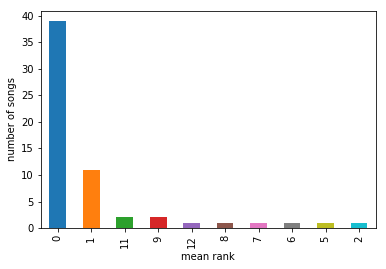

In [25]:
fig = pd.Series([rank[1] for rank in ranks]).value_counts().plot('bar')
fig.set_xlabel("mean rank")
fig.set_ylabel("number of songs")

Es daher kann vermutet werden, dass konstante Songs eher einen niedrigen mittleren Rang erreichen, da ihre Teilsequenzen ähnlicher sind. Songs welche in der ersten Hälfte der Spielzeit einen großen Unterschied zur zweiten Hälfte aufweisen fallen dann als Ausreißer ins Gewicht. Dies könnte z.B. bei Songs mit einem Intro der Fall sein. Dennoch funktioniert die euklidische Distanz sehr gut und weist 39 von 60 Songs die richtige zweite Teilsequenz zu.

## Merkmalsauswahl mit dem genetischen Algorithmus
In diesem Abschnitt soll unter Anwendung eines selbst zu implementierenden genetischen Algorithmus eine Untermenge wichtiger Merkmale aus den insgesamt 42 angelegten Merkmalen berechnet werden.
Als Vorlage kann hierfür die Implementierung für die [Lösung des TSP Problems](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html) herangezogen werden. Anzupassen sind dann jedoch mindestens die Fitness-Funktion, die Kreuzungs- und die Mutationsfunktion. Die Fitness soll so wie im vorigen Teilabschnitt mit dem mittleren Rang berechnet werden. Die Populationsgröße, die Anzahl der auszuwählenden Merkmale und die Anzahl der Iterationen sollen als Parameter einstellbar sein.

Der Fitnesswert des besten Individuums in der Population soll in jeder Iteration gespeichert werden. Der Verlauf dieses besten Fitness-Wertes über den Fortlauf der Iterationen soll graphisch ausgegeben werden.

Ein Pandas Frame, der nur die berechneten wichtigsten Merkmale aus _FeatureFileTrainingAllList1.csv_ enthält soll angelegt und in die csv Datei _subFeaturesTrain1.csv_ geschrieben werden.

**Aufgaben:**
1. Implementieren Sie die die Merkmalsauswahl mit dem genetischen Algorithmus entsprechend der o.g. Beschreibung
2. Beschreiben Sie kurz das Konzept ihrer Kreuzungs- und Mutationsfunktion. 
3. Bestimmen Sie eine möglichst kleine Merkmalsuntermenge mit einem möglichst guten mittleren Rang? Geben Sie sowohl die gefundenen wichtigsten Merkmale als auch den zugehörigen mittleren Rang an.
4. Um wieviel verschlechtert sich der Mittlere Rang, wenn nur die 10 wichtigsten Merkmale benutzt werden?

#### Genetischer Algorithmus für die Music Feature Selection

## Aufgabe 2.1

Um das Modul multiprocessing in JupyterNotebook nutzen zu können, um mehrere CPU-Kerne zu beschäftigen, ist die Auslagerung des Codes in eine externe .py Datei notwendig. Unten befindet sich unser Code für die Implementierung des genetischen Algorithmus. In den zukünftigen Aufgaben wird dieser mit "from gamc import *" importiert.

### Inhalt der Datei gamc.py:

In [27]:
import operator
import numpy as np
import copy
from multiprocessing import *
import queue
import matplotlib.pyplot as plt
import time
from scipy.stats import pearsonr
import operator

class Individual:
# a individual "creature" in the genetic algorithm concept
# It has following attributes:
# nofattributes = how many features/settings are there? In the music clustering we can use 42 features for clustering

# used_attributes = how many features/settings this individual uses out of the total nofattributes (e.g. 15 out of 42)

# attribute_settings = a numerical list with length=nofattributes and sum(list)=used_attributes. Each element in the list corresponds to an # extracted feature (= column in dataframe). attribute_settings[0] refers to the first column in the dataframe and so on. Valid elements in # the list are 0 and 1. 0 means this feature is turned off/ignored, 1 means this feature is used for fitness calculation and clustering.

# similarity = "euclid" or "pearson". This sets the similarity measure, which is used to calculate the fitness of the individual.

# random = if True the individual is initialized with random attribute_settings. If False an attribute_settings list with 0 and 1 can be  #passed to the class constructor to initialize an individual with desired attribute_settings.

    def get_data():
    # this function loads the FeatureFileTraining-csv files once as static class variables in form of a pandas dataframe
        import pandas as pd
        df1 = pd.DataFrame.from_csv("FeatureFileTrainingAllList1.csv")
        df2 = pd.DataFrame.from_csv("FeatureFileTestAllList2.csv")

        import sklearn.preprocessing as skp
        import numpy as np

        for df in [df1,df2]:
            for i in range(0,len(df.columns)):
                df.iloc[:,i] = skp.scale(df.iloc[:,i])
        return [df1,df2]
    
    # set static class variables
    df1 = get_data()[0]
    df2 = get_data()[1]
    
    def __init__(self, nofattributes,used_attributes,similarity,attribute_settings=0,random=True):
    # class constructor
        self.nofattributes = nofattributes
        self.used_attributes = used_attributes
        self.similarity = similarity
        if(random):
            # perform random initialization of attribute_settings
            settings = np.zeros(nofattributes)
            for i in range(0,used_attributes):
                success = False
                while(not success):
                    index = np.random.randint(0,self.nofattributes)
                    if(settings[index]==0):
                        settings[index] = 1
                        success=True
            self.attribute_settings = [*settings]
        else:
            # use attribute_settings passed to the constructor
            self.attribute_settings = attribute_settings
        # calculate fitness of this individual
        self.calcFitness()
   
    
    def cross(self,partner,mutprob):       
        found_segment = False
        locus_length = 0
        # start search for matching segments in both individuals
        while(not found_segment):
            # randomly pick 2 segment indices (segment start and segment end)
            locus_start = np.random.randint(0,self.nofattributes-1)
            locus_end = np.random.randint(locus_start+1,self.nofattributes)
            locus_length = locus_end-locus_start
            
            # compare number of attributes set in the segment in self and mating partner
            sum_self = sum(self.attribute_settings[locus_start:locus_end])
            sum_partner = sum(partner.attribute_settings[locus_start:locus_end])
            
            # if the sums are the same and the locus_lenght is at least a 10th of the DNA-string accept segment
            if(sum_self == sum_partner and locus_length> int(self.nofattributes/10)):
                found_segment=True

        # copy the settings from self individual       
        settings = copy.deepcopy(self.attribute_settings)
        # replace the segment from self with the partners segment
        settings[locus_start:locus_end] = partner.attribute_settings[locus_start:locus_end]
        
        # create the child with the new crossed attribute settings
        child = Individual(self.nofattributes,self.used_attributes,self.similarity,attribute_settings=settings,random=False)
        # let the child mutate with a probability of mutprob
        child.mutate(mutprob)
        # calculate the fitness of the child
        child.calcFitness()
        return child
                  
    def mutate(self,probability):
        # this function iterates over every gene (bit) in the DNA (attribute_settings) and flips it with a certain probabilty
        # If a flip is performed, the number of set attributes doesn't match the self.used_attributes anymore. 
        # Therefore an inverse flip must be applied somewhere else in the DNA.
        for i in range(0,self.nofattributes):
            # roll for mut probability 
            if(np.random.rand()<probability):
                # if probability is hit start mutation for gene
                action = "none"
                # if attribute is 1 set to 0 and remember decrease (action="dec")
                # if attribute is 0 set to 1 and remember increase (action="inc")
                if(self.attribute_settings[i]==1):
                    self.attribute_settings[i] = 0
                    action ="dec"
                else:
                    self.attribute_settings[i] = 1
                    action ="inc"
                    
                #search for random bit which can be inversed to counter increase or decrease action
                repaired = False
                while(not repaired):
                    idx = np.random.randint(self.nofattributes-1)
                    
                    if(idx!=i):
                        if(self.attribute_settings[idx]==0 and action=="dec"):
                            self.attribute_settings[idx]=1
                            repaired = True
                        elif(self.attribute_settings[idx]==1 and action=="inc"):
                            self.attribute_settings[idx]=0
                            repaired = True

        return self
                
    def calcFitness(self):
        # sim_list is a similarity dictionary (key=song1 / value=tuple(songX name, similariy value of songX with song1)
        sim_list = {}
        for index1, row1 in self.df1.iterrows():
                inner_dic = {}
                for index2, row2 in self.df2.iterrows():
                    # row1 = song1
                    # row2 = song2
                    r1 = row1.tolist()
                    r2 = row2.tolist()
                    
                    # filter out feature values which are not set in self.attribute_settings
                    rn1 = []
                    rn2 = []
                    for i in range(0,len(self.attribute_settings)):
                        if(self.attribute_settings[i]==1):
                            rn1.append(r1[i])
                            rn2.append(r2[i])
                    
                    # with filtered rows rn1 and rn2 perform similarity measurement
                    if(self.similarity=="euclid"):
                        value = np.linalg.norm(np.transpose(rn1)-np.transpose(rn2))
                    elif(self.similarity=="pearson"):
                        r,p = pearsonr((np.transpose(rn1))     ,     (np.transpose(rn2)))
                        if(r<0):
                            value = 1+r
                        else:
                            value = 1-r
                    else:
                        print("WRONG SIMILARITY OPTION")
                
                    inner_dic[index2] = value
                # sort list of songs from similar songs to different songs  
                sim_list[index1] = sorted(inner_dic.items(), key=operator.itemgetter(1))  
                
        
        #calculte the rank of each song and save it in ranks
        ranks = []
        for song in sim_list:
            for rank in range(0,len(sim_list[song])):
                if(sim_list[song][rank][0] == song):
                    ranks.append((song,rank))
        
        # calculate the mean rank using ranks and set self.fitness= mean rank
        summ = 0
        for song in ranks:
            summ += song[1]
        self.fitness = summ/len(ranks)
        return self.fitness


class Population:
# a Population is a crowd of "creatures" in the genetic algorithm concept
# It has following attributes:

# popsize = the number of individuals which "live" in this population

# population = a list of Individual objects which are part of this population

# nofattributes = the number of attributes the Individuals in this population have

# used_attributes = the number of attributes which are set to 1 in the Individuals attribute_settings

# mutprob = the mutation probability when two individuals of this population are crossed

# similarity = the similarity measure method used when calculating the fitness of the Individuals in this population

    def __init__(self,nofattributes,used_attributes,popsize,mutprob,similarity,population=[]):
        self.popsize = popsize
        self.population = population
        self.nofattributes = nofattributes
        self.used_attributes = used_attributes
        self.mutprob = mutprob
        self.similarity = similarity
    
    def add(self,ind):
        # adds an Individual to this population
        self.population.append(ind)
    
    def random_populate(self):
        # generates random Individuals and adds them to this population until the population size is reached
        self.population = []
        while(len(self.population)<self.popsize):
            self.add(Individual(self.nofattributes,self.used_attributes,self.similarity))
    
    def random_populate_multicore(self,cores):
        # generates random Individuals and adds them to this population until the population size is reached using multiple cores
        # cores specifies how many cores are used
        
        # start with an empty population 
        self.population = []
        
        # Queue acts as a thread-safe memory for created Individuals
        q = Queue()
        
        # determine chunk sizes for each thread
        chunks = [self.popsize // cores]*cores
        rest = self.popsize - sum(chunks)
        for i in range(0,cores-1):
            if rest>0:
                chunks[i]+=1
                rest-=1
        
        # create processes with corresponding chunk sizes
        processes = []
        for core in range(0,cores):
            processes.append(Process(target=self.createRandomChildren, args=(chunks[core],self.similarity,q)))
        
        # start processes
        for process in processes:
            process.start()
        
        # collect results
        results = []
        while True:
            try:
                result = q.get(False, 0.01)
                results.append(result)
            except queue.Empty:
                pass

            allExited = True
            for t in processes:
                if t.exitcode is None:
                    allExited = False
                    break
                    
            if allExited & q.empty():
                break
        
        # terminate processes
        for process in processes:
            process.join()
         
        # add all created children from results to the population
        for random_Individual in results:
            self.add(random_Individual)

            
    def createRandomChildren(self,nofchildren,similarity,q):
        # helper function for multicore functions
        # creates nofchildren random Individuals and adds them to the queue q
        for i in range(0,nofchildren):
            q.put(Individual(self.nofattributes,self.used_attributes,similarity))

        
    def getMeanFitness(self):
        # calculate the mean fitness of this populations Individuals
        summ = 0
        for ind in self.population:
            summ+=ind.fitness
        return summ/len(self.population)
    
    def getMaxFitness(self):
        # returns the Individual with the best fitness of this population
        best = self.population[0].fitness
        best_ind = self.population[0]
        for ind in self.population:
            if(ind.fitness<best):
                best = ind.fitness
                best_ind = ind 
        return(best_ind)
    
    def selectPartners(self):
        # select 2 partners from the population which later can be mated/crossed with cross()
        # To select partners a roulette wheel selection is performed depending on Individuals fitness
        # The greater the fitness the more likely it is, that an Individual is selected
        
        #result list
        partners = []
        # dictionary with key=Individual value=1/fitness
        # 1/fitness because a high mean rank is bad, whereas a low mean rank is considered a good fitness
        dic = {}
        for ind in self.population:
            dic[ind] = (1/ind.fitness)
        
        # sum of the fitness values = perimeter of the roulette wheel
        max = sum(dic.values())
        
        # spin the roulette wheel two times for selecting two partners
        for i in range(0,2):
            # spin wheel
            pick = np.random.uniform(0,max)
            
            # determine the Individual selected from the wheel
            current = 0
            for key, value in dic.items():
                current += value
                if current > pick:
                    # select Individual and append to result list
                    partners.append(key)
                    break
                    
        return partners
    
    def getNextGeneration(self):
        # generate the next generation out of this population
        # Indivudals are selected, crossed, mutated and the resulting children are appended to a new Population object
        
        # create new Population
        new_pop = Population(self.nofattributes,self.used_attributes,self.popsize,self.mutprob,self.similarity,population=[])
        
        # fill until popsize is reached
        while(len(new_pop.population) < new_pop.popsize):
            partners = self.selectPartners()
            child = partners[0].cross(partners[1],self.mutprob)
            new_pop.add(child)
        
        return new_pop

    def createChildren(self,nofchildren,q):
        # helper function for multicore functions
        # creates nofchildren Individuals by selection and crossing from this Population and adds them to the queue q
        for i in range(0,nofchildren):
            partners = self.selectPartners()
            child = partners[0].cross(partners[1],self.mutprob)
            q.put(child)

    def getNextGeneration_multicore(self,cores):
        # generate the next generation out of this population using multiple cores
        # Indivudals are selected, crossed, mutated and the resulting children are appended to a new Population object
        
        # create new Population
        new_pop = Population(self.nofattributes,self.used_attributes,self.popsize,self.mutprob,self.similarity,population=[])

        if True:
            # Queue acts as a thread-safe memory for created Individuals
            q = Queue()
            
             # determine chunk sizes for each thread
            chunks = [self.popsize // cores]*cores
            rest = self.popsize - sum(chunks)
            for i in range(0,cores-1):
                if rest>0:
                    chunks[i]+=1
                    rest-=1
            
            # create processes with corresponding chunk sizes
            processes = []
            for core in range(0,cores):
                processes.append(Process(target=self.createChildren, args=(chunks[core],q)))
            
            # start processes
            for process in processes:
                process.start()

            # collect results
            results = []
            while True:
                try:
                    result = q.get(False, 0.01)
                    results.append(result)
                except queue.Empty:
                    pass

                allExited = True
                for t in processes:
                    if t.exitcode is None:
                        allExited = False
                        break
                if allExited & q.empty():
                    break

            #terminate processes
            for process in processes:
                process.join()
            
            # add all created children from results to the population
            for child in results:
                new_pop.add(child)

            return new_pop

class experiment:
# an experiment is a easy to use framework class for performing a genetic algorithm based search
# It has following attributes:

# nofcores = number of cores used for calcuations (population initialization and calculation of new generations)

# popsize = the population size of the generations

# used_attributes=  the number of attributes which are set in each Individuals attribute_settings

# iterations = how many generations are created/searched by the genetic algorithm

# mutprob = the mutation probabilty while crossing

# similarity = the similarity measure used for calculating the fitness of Individuals

# nofattributes = the length of each Individuals attribute_settings (42 features is default because 42 extracted features)

    def __init__(self, nofcores,popsize,used_attributes,iterations,mutprob,similarity,nofattributes=42):
        self.nofcores = nofcores
        self.popsize = popsize
        self.used_attributes = used_attributes
        self.iterations = iterations
        self.mean_fitness = []
        self.alltime_best_fitness = []
        self.current_best_fitness = []
        self.nofattributes = nofattributes
        self.mutprob = mutprob
        self.similarity = similarity

    def start(self):
        # create new population
        p = Population(self.nofattributes,self.used_attributes,self.popsize,self.mutprob,self.similarity)
        start_time = time.time()
        # populate population with random Individuals
        p.random_populate_multicore(self.nofcores)
        print("rand init Time was: "+str(round((time.time() - start_time))))
        
        # calculate and analyse the next generation
        for iteration in range(0,self.iterations):
            if(iteration%10==0):
                print("iteration: "+str(iteration))
                
            #save mean fitness
            self.mean_fitness.append(p.getMeanFitness())
            #save individual with best fitness in this population
            current_fitness = p.getMaxFitness()
            self.current_best_fitness.append((current_fitness,current_fitness.fitness))
            #save alltime best individual since experiment started
            if(iteration==0 or current_fitness.fitness < self.alltime_best_fitness[-1][1]):
                self.alltime_best_fitness.append((current_fitness,current_fitness.fitness))
            else:
                self.alltime_best_fitness.append(self.alltime_best_fitness[-1])
            # calculate the next generation multicore
            p = p.getNextGeneration_multicore(self.nofcores)
        
        #save the final last population after all iterations finished
        self.finalpop = p
        
    def plot(self):
        # plot the results of this experiment
        alltime = [x[1] for x in self.alltime_best_fitness]
        curr = [x[1] for x in self.current_best_fitness]

        plt.plot(self.mean_fitness)
        plt.plot(curr)
        plt.plot(alltime)
        plt.ylabel('mean rank')
        plt.xlabel('GA iterations')
        plt.legend(['pop mean fitness', 'current pop best', 'alltime best'], loc='upper left')
        plt.show()

## Aufgabe 2.2

TODO

## Aufgabe 2.3

Um eine möglichst kleine Merkmalsuntermenge mit dem besten mittleren Rang zu ermitteln, werden mehrere Experimente durchgeführt. Von den 42 verfügbaren Merkmalen werden alle Untermengen mit Mächtigkeiten von 10 bis 25 getestet (16 Untermengen). Für jede dieser 16 Untermengen werden jeweils 4 Experimente mit unterschiedlichen Populationsgrößen durchgeführt *P=[10,25,50,100]*. Somit ergibt sich eine Gesamtanzahl von 64 Experimenten.

Als Ähnlichkeitsmaß wird die euklidische Distanz verwendet. Bei der Kreuzung ist die Mutationswahrscheinlichkeit auf 1% je Bit eingestellt. Bei jedem Experiment werden 100 folgende Generationen erzeugt beziehungsweise Iterationen durchlaufen. Somit werden in allen 64 Experimenten 296000 Individuen erstellt und durchsucht. Anschließend werden die Experimente mit dem Modul pickle serialisiert und auf der Festplatte gespeichert.

In [ ]:
from gamc import *
popsize = [100,50,25,10]
used_attributes = list(range(10,26))
similarity = "euclid"
mutprob = 0.01
iterations = 100

experiments = []
nofexperiments = len(popsize)*len(used_attributes)
finished_experiments = 0

for pops in popsize:
    for ua in used_attributes:
        if(pops<=10):
            nofcores = 2
        elif(pops<=50):
            nofcores = 4
        else:
            nofcores = 6  
        e = experiment(nofcores,pops,ua,iterations,mutprob,similarity)
        e.start()
        experiments.append(e)

import pickle
output = open('experiments.pkl', 'wb')
pickle.dump(experiments, output)
output.close()

Somit kann immer wieder auf die Ergebnisse der Experimente zurückgegriffen werden und diese analysiert werden. Im folgenden werden die Ergebnisse der 64 Experimente als Diagramm dargestellt. Die blaue Linie zeigt die durchschnittliche Fitness jeder Generation. Die gelbe Linie zeigt die aktuelle beste Fitness für jede Generation. Die grüne Linie zeigt die bis zu dieser Generation beste ermittelte Fitness aus allen vorherigen Generationen. Die Darstellung ist sortiert, das erste Diagramm zeigt das Experiment mit dem besten Ergebnis (niedrigster mittlerer Rang), danach folgen die weiteren Experimente in absteigender Fitness:

Experiment with Popsize:100 and 15 used attributes/features
Best fitness: 0.4


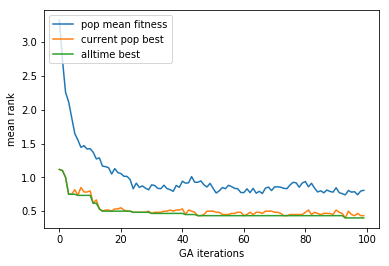

Experiment with Popsize:100 and 17 used attributes/features
Best fitness: 0.4


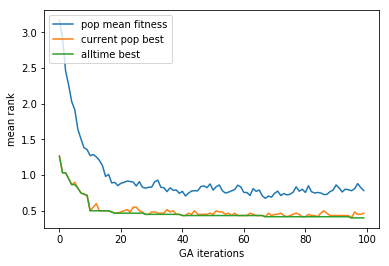

Experiment with Popsize:100 and 18 used attributes/features
Best fitness: 0.4


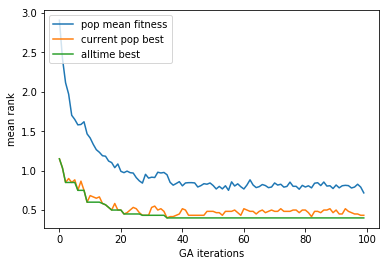

Experiment with Popsize:100 and 19 used attributes/features
Best fitness: 0.4


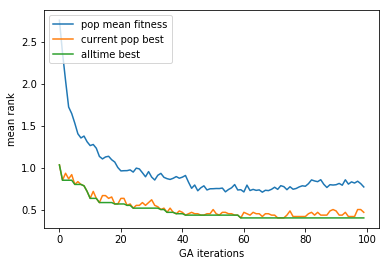

Experiment with Popsize:100 and 13 used attributes/features
Best fitness: 0.4166666666666667


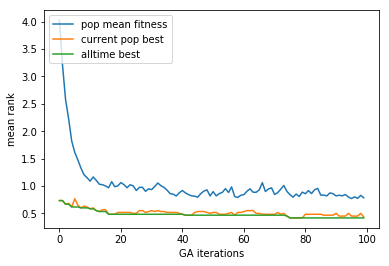

Experiment with Popsize:100 and 16 used attributes/features
Best fitness: 0.4166666666666667


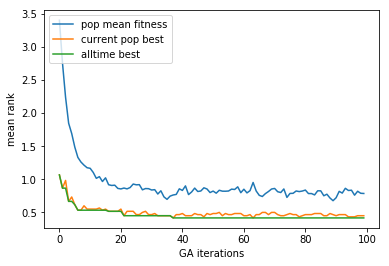

Experiment with Popsize:100 and 21 used attributes/features
Best fitness: 0.4166666666666667


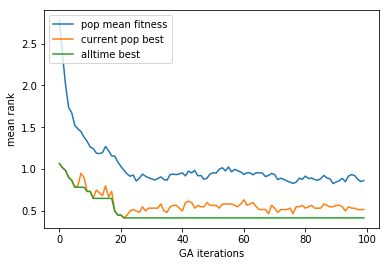

Experiment with Popsize:100 and 11 used attributes/features
Best fitness: 0.43333333333333335


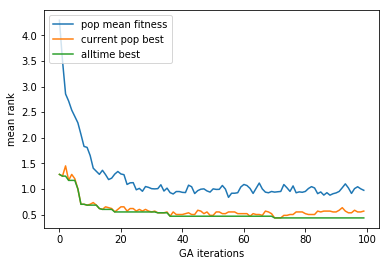

Experiment with Popsize:100 and 14 used attributes/features
Best fitness: 0.43333333333333335


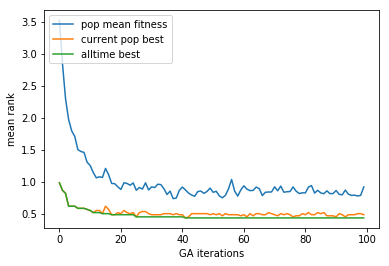

Experiment with Popsize:100 and 20 used attributes/features
Best fitness: 0.43333333333333335


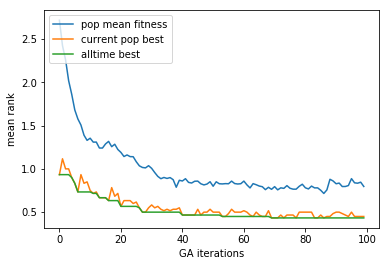

Experiment with Popsize:100 and 22 used attributes/features
Best fitness: 0.43333333333333335


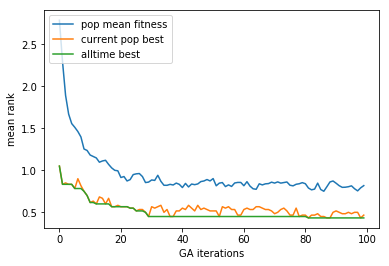

Experiment with Popsize:50 and 16 used attributes/features
Best fitness: 0.43333333333333335


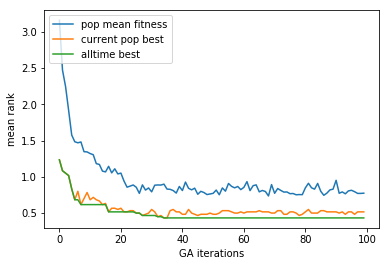

Experiment with Popsize:50 and 18 used attributes/features
Best fitness: 0.43333333333333335


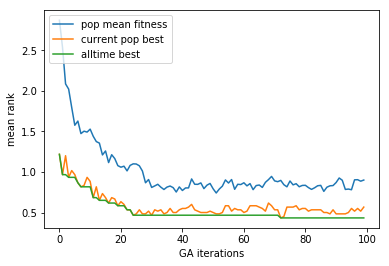

Experiment with Popsize:50 and 21 used attributes/features
Best fitness: 0.43333333333333335


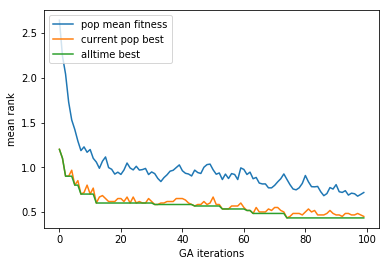

Experiment with Popsize:50 and 17 used attributes/features
Best fitness: 0.45


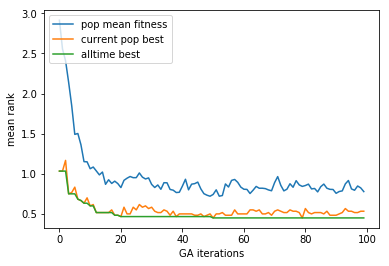

Experiment with Popsize:50 and 19 used attributes/features
Best fitness: 0.45


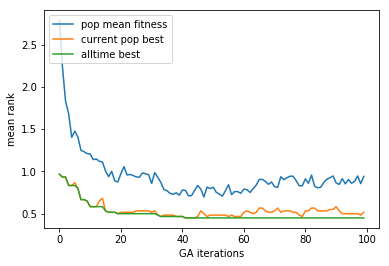

Experiment with Popsize:50 and 20 used attributes/features
Best fitness: 0.45


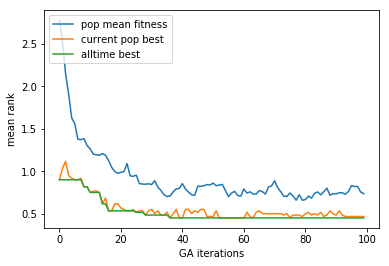

Experiment with Popsize:50 and 24 used attributes/features
Best fitness: 0.45


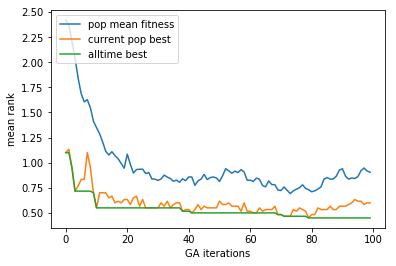

Experiment with Popsize:25 and 14 used attributes/features
Best fitness: 0.45


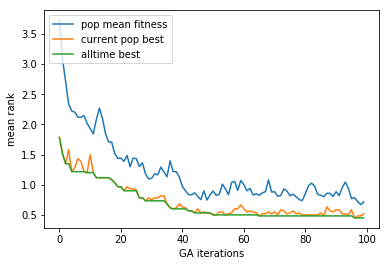

Experiment with Popsize:25 and 15 used attributes/features
Best fitness: 0.45


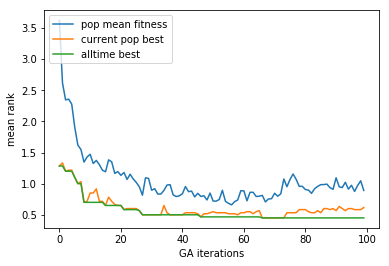

Experiment with Popsize:25 and 17 used attributes/features
Best fitness: 0.45


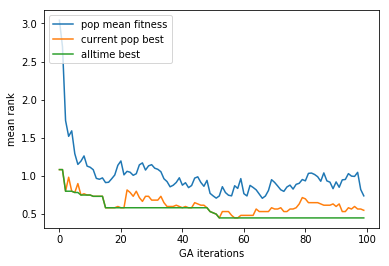

Experiment with Popsize:25 and 22 used attributes/features
Best fitness: 0.45


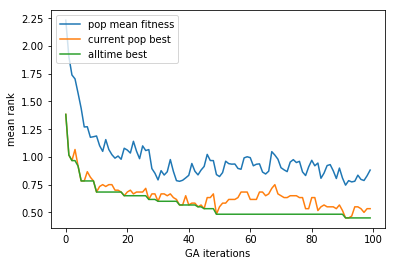

Experiment with Popsize:100 and 23 used attributes/features
Best fitness: 0.4666666666666667


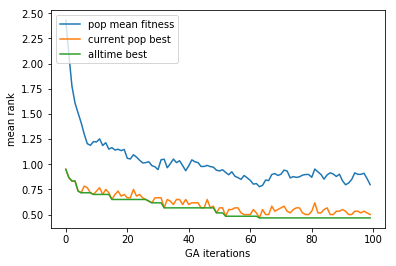

Experiment with Popsize:100 and 24 used attributes/features
Best fitness: 0.4666666666666667


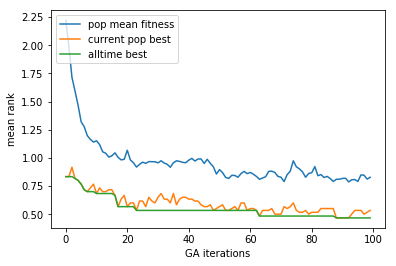

Experiment with Popsize:50 and 12 used attributes/features
Best fitness: 0.4666666666666667


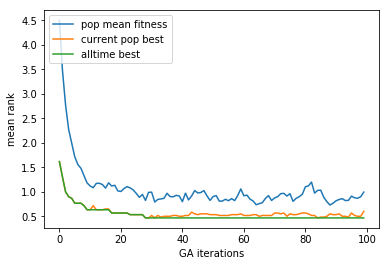

Experiment with Popsize:50 and 13 used attributes/features
Best fitness: 0.4666666666666667


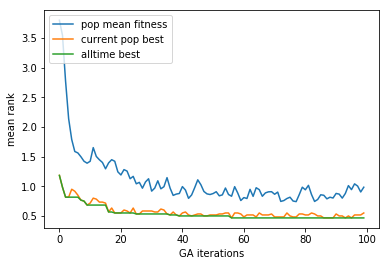

Experiment with Popsize:50 and 14 used attributes/features
Best fitness: 0.4666666666666667


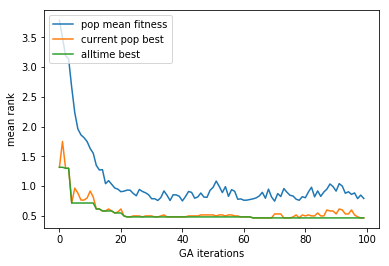

Experiment with Popsize:50 and 22 used attributes/features
Best fitness: 0.4666666666666667


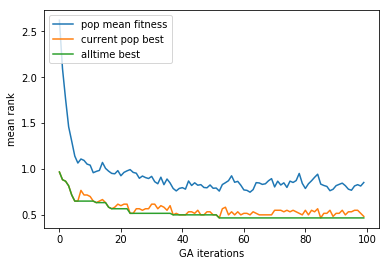

Experiment with Popsize:25 and 13 used attributes/features
Best fitness: 0.4666666666666667


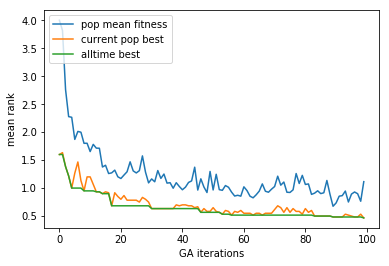

Experiment with Popsize:25 and 16 used attributes/features
Best fitness: 0.4666666666666667


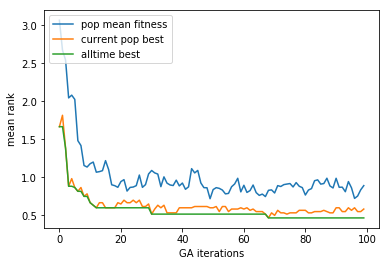

Experiment with Popsize:25 and 18 used attributes/features
Best fitness: 0.4666666666666667


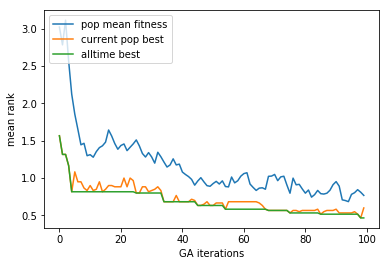

Experiment with Popsize:100 and 12 used attributes/features
Best fitness: 0.48333333333333334


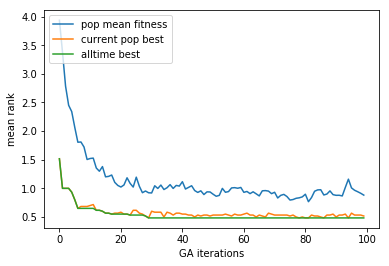

Experiment with Popsize:100 and 25 used attributes/features
Best fitness: 0.48333333333333334


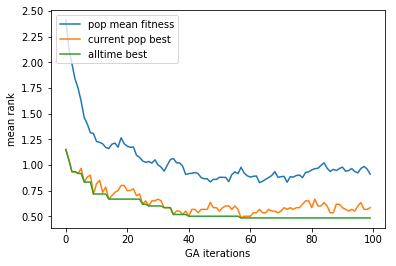

Experiment with Popsize:50 and 15 used attributes/features
Best fitness: 0.48333333333333334


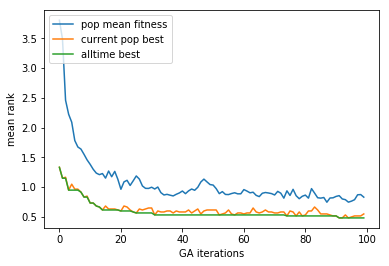

Experiment with Popsize:25 and 20 used attributes/features
Best fitness: 0.48333333333333334


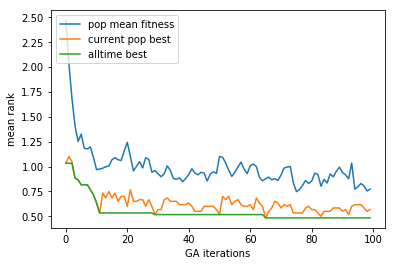

Experiment with Popsize:25 and 21 used attributes/features
Best fitness: 0.48333333333333334


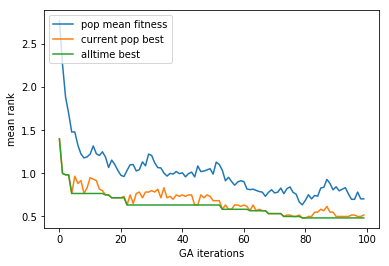

Experiment with Popsize:50 and 11 used attributes/features
Best fitness: 0.5


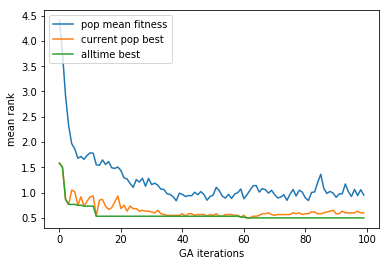

Experiment with Popsize:25 and 12 used attributes/features
Best fitness: 0.5


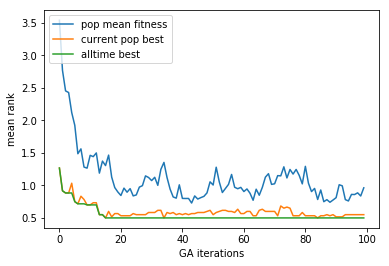

Experiment with Popsize:25 and 19 used attributes/features
Best fitness: 0.5


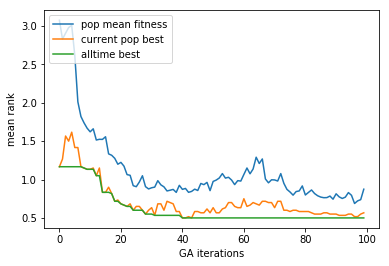

Experiment with Popsize:100 and 10 used attributes/features
Best fitness: 0.5166666666666667


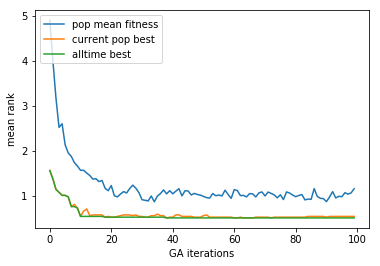

Experiment with Popsize:50 and 25 used attributes/features
Best fitness: 0.5166666666666667


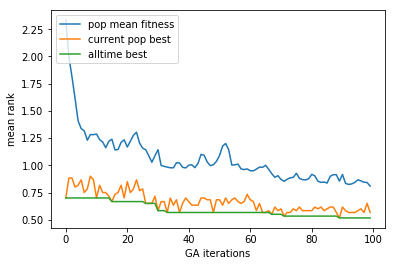

Experiment with Popsize:25 and 11 used attributes/features
Best fitness: 0.5166666666666667


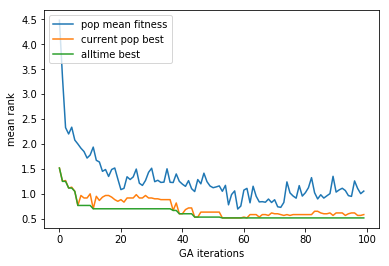

Experiment with Popsize:10 and 13 used attributes/features
Best fitness: 0.5166666666666667


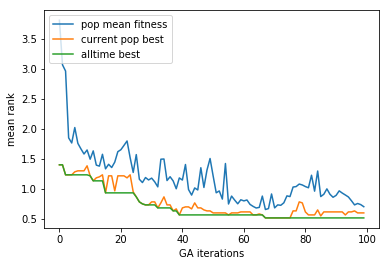

Experiment with Popsize:50 and 23 used attributes/features
Best fitness: 0.5333333333333333


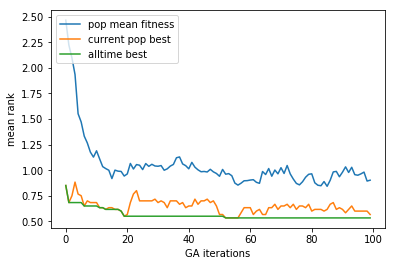

Experiment with Popsize:25 and 24 used attributes/features
Best fitness: 0.5333333333333333


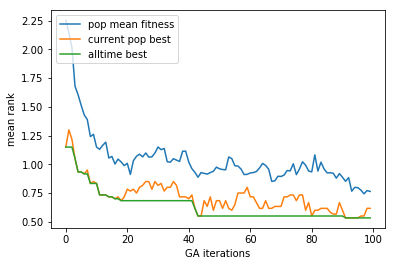

Experiment with Popsize:10 and 15 used attributes/features
Best fitness: 0.5333333333333333


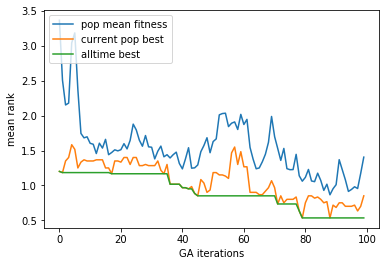

Experiment with Popsize:50 and 10 used attributes/features
Best fitness: 0.55


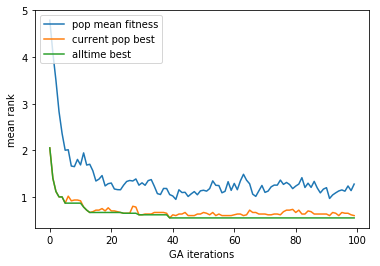

Experiment with Popsize:10 and 14 used attributes/features
Best fitness: 0.55


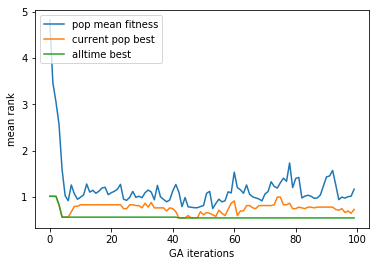

Experiment with Popsize:10 and 17 used attributes/features
Best fitness: 0.55


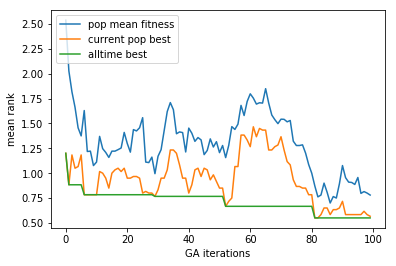

Experiment with Popsize:25 and 10 used attributes/features
Best fitness: 0.5666666666666667


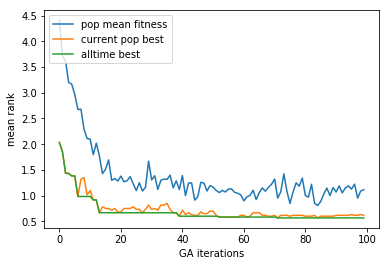

Experiment with Popsize:25 and 23 used attributes/features
Best fitness: 0.5666666666666667


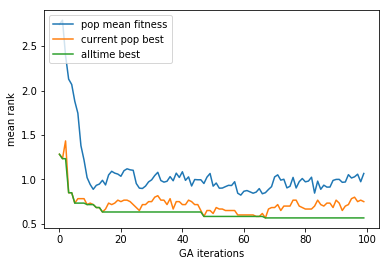

Experiment with Popsize:10 and 16 used attributes/features
Best fitness: 0.5833333333333334


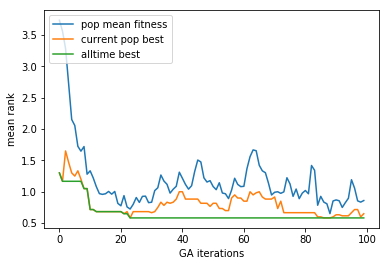

Experiment with Popsize:10 and 18 used attributes/features
Best fitness: 0.6


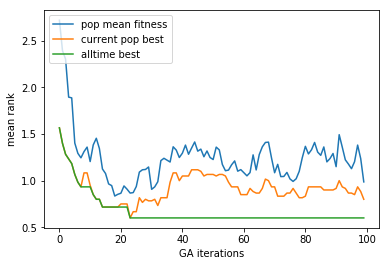

Experiment with Popsize:10 and 11 used attributes/features
Best fitness: 0.6166666666666667


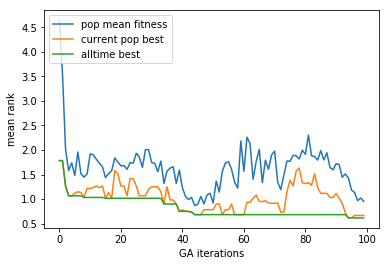

Experiment with Popsize:10 and 12 used attributes/features
Best fitness: 0.6166666666666667


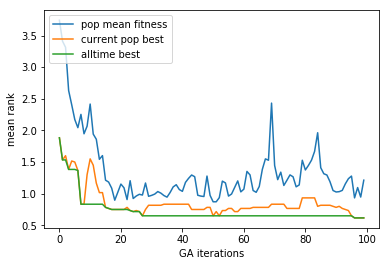

Experiment with Popsize:25 and 25 used attributes/features
Best fitness: 0.6333333333333333


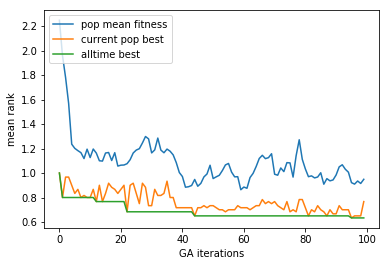

Experiment with Popsize:10 and 10 used attributes/features
Best fitness: 0.6333333333333333


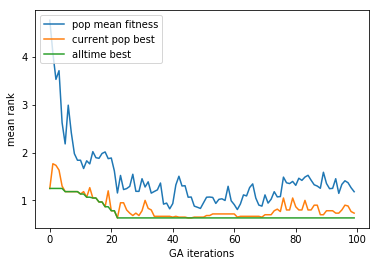

Experiment with Popsize:10 and 20 used attributes/features
Best fitness: 0.6333333333333333


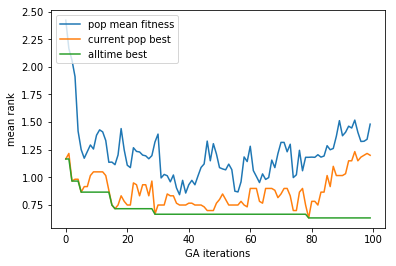

Experiment with Popsize:10 and 24 used attributes/features
Best fitness: 0.65


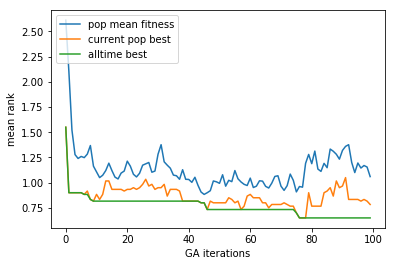

Experiment with Popsize:10 and 22 used attributes/features
Best fitness: 0.6833333333333333


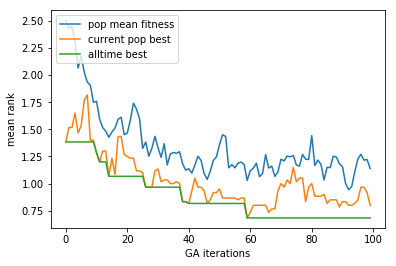

Experiment with Popsize:10 and 19 used attributes/features
Best fitness: 0.7


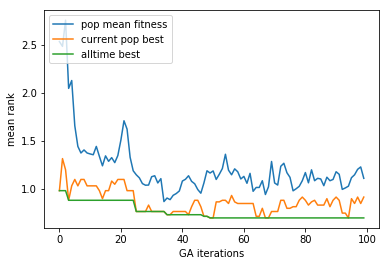

Experiment with Popsize:10 and 25 used attributes/features
Best fitness: 0.7


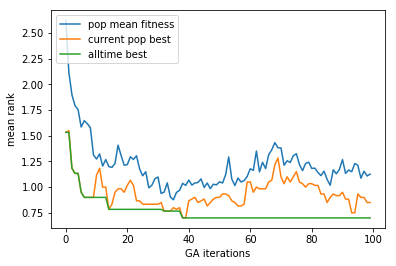

Experiment with Popsize:10 and 23 used attributes/features
Best fitness: 0.7333333333333333


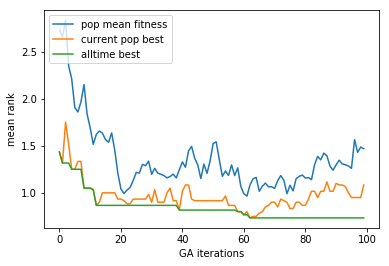

Experiment with Popsize:10 and 21 used attributes/features
Best fitness: 0.7666666666666667


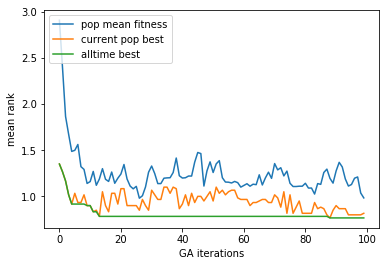

In [14]:
# import experiments
pkl_file = open('experiments_20180601.pkl', 'rb')
e = pickle.load(pkl_file)
pkl_file.close()

e.sort(key=lambda x: x.alltime_best_fitness[-1][1], reverse=False)
for ex in e:
    print("Experiment with Popsize:"+str(ex.popsize)+" and "+str(ex.used_attributes)+" used attributes/features")
    print("Best fitness: "+str(ex.alltime_best_fitness[-1][1]))
    ex.plot()

Der Einfluss der Populationsgröße und der Anzahl der eingesetzten Features lässt sich mit folgendem Scatterplot verdeutlichen. Generell lässt sich daraus ableiten: je höher die Populationsgröße ist, desto besser sind die Ergebnisse im Vergleich zu kleineren Populationsgrößen. Fast durchgehend befinden sich die roten Punkte mit einer Populationsgröße von 100 auf der x-Achse links von niedrigeren Populationsgrößen. Auch bei der Feature-Anzahl lässt sich erkennen dass es zwischen 15 und 19 verwendeten Features einen "sweetspot" zu geben scheint. Mehr Features führen dann nicht mehr zu einer Verbesserung des mittleren Rangs.
Die Streuung in x-Richtung ist mit Faktor 2 zwischen bestem und schlechtestem Ergebnis nicht zu vernachlässigen. Aber auch schon Populationsgrößen von 25 können sehr gute Ergebnisse erzielen.

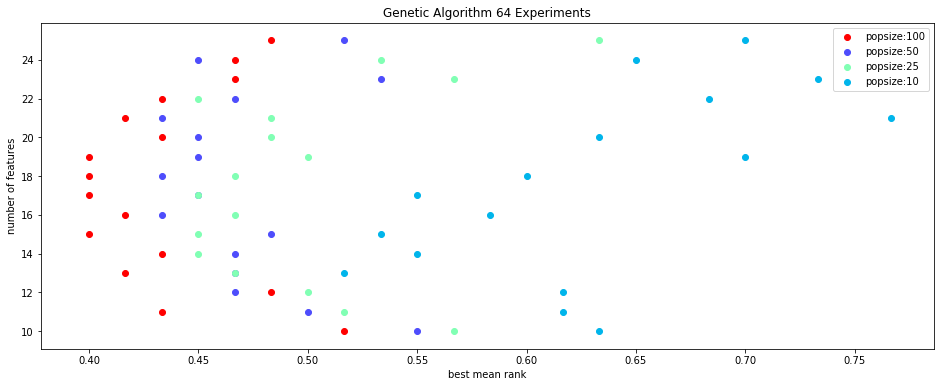

In [167]:
import matplotlib.pyplot as plt
from random import shuffle

classes = [100,50,25,10]
unique = list(set(classes))
colors = [plt.cm.rainbow(float(i)/max(unique)) for i in unique]
shuffle(colors)

for popsize in range(0,len(classes)):
    experiments =   [x for x in e if x.popsize == classes[popsize]]
    x=[x.alltime_best_fitness[-1][1] for x in experiments]
    y=[x.used_attributes for x in experiments]
    plt.scatter(x, y, c=colors[popsize], label=str("popsize:"+str(classes[popsize])))
plt.legend()
plt.rcParams["figure.figsize"] = [16,6]
plt.xlabel("best mean rank")
plt.ylabel("number of features")
plt.title("Genetic Algorithm 64 Experiments")
plt.show()

Das beste Ergebnis mit einem mittleren Rang von 0.4 konnte von mehreren Experimenten mit der Populationsgröße 100 erreicht werden. Das Experiment aus dieser Gruppe mit den wenigstens verwendeten Merkmalen, nutzt folgende 15 Features:

In [163]:
best_features = []
attributes = df1.columns.get_values().tolist()
for i in range(0,42):
    if(e[0].alltime_best_fitness[-1][0].attribute_settings[i]==1.0):
        best_features.append(attributes[i])
best_features

['amp1skew',
 'amp1dskew',
 'amp10std',
 'amp10skew',
 'amp10dskew',
 'amp100dstd',
 'amp100dkurt',
 'amp1000std',
 'power1',
 'power4',
 'power6',
 'power7',
 'power8',
 'power9',
 'power10']

Anlegen eines Pandas dataframe mit den ermittelten Merkmalen:

In [170]:
import copy
dfc = copy.deepcopy(df1)

for feature in dfc.columns.get_values().tolist():
    if(feature not  in best_features):
        del dfc[feature]
        
dfc.to_csv("subFeaturesTrain2.csv")
dfc

,amp1skew,amp1dskew,amp10std,amp10skew,amp10dskew,amp100dstd,amp100dkurt,amp1000std,power1,power4,power6,power7,power8,power9,power10
Adele\01 Hometown Glory.mp3,2.872964,2.381091,-1.095311,1.348877,-0.365493,-1.293496,-0.818510,-1.227470,-1.391123,1.737095,-0.844317,-1.586884,-1.366235,-0.183381,-1.400626
Adele\02 I'll Be Waiting.mp3,0.582953,0.757480,-0.372479,-0.288498,-0.941164,-0.677812,-1.079408,-0.619809,-0.617365,1.228305,0.672293,-0.294418,-0.090637,-0.180477,-0.854365
Adele\03 Don't You Remember.mp3,1.083192,0.901385,-0.474315,-0.165883,0.577455,-0.529172,-1.048289,-0.537667,-1.288164,1.389280,0.478940,-0.507203,1.210078,1.508138,-1.493994
Adele\04 Turning Tables.mp3,1.522685,1.305449,-1.086144,0.532291,-0.534346,-1.303426,-0.849030,-1.279299,-2.022388,1.673301,0.738740,-0.551655,-0.110777,1.768929,0.295994
Adele\05 Set Fire To The Rain.mp3,0.949064,1.195427,-0.547233,-0.093019,0.156023,-0.620939,-1.162406,-0.580401,-1.075119,1.905737,0.366649,-0.711752,-0.002929,0.410124,-0.973227
Adele\06 If It Hadn't Been For Love.mp3,0.995088,1.086029,-0.830216,2.315447,-0.217400,-0.717955,-0.868020,-0.743102,-1.412519,1.103096,0.354669,-0.708603,-0.345480,0.460725,-0.537021
Adele\08 Take It All.mp3,2.954399,1.076136,-1.259589,1.332840,-0.909362,-1.278977,-0.909171,-1.341719,-2.074538,1.096841,1.770101,0.014934,0.035694,0.509044,-0.974029
Adele\09 Rumour Has It.mp3,0.273734,0.683626,-0.262916,-0.209912,-0.355824,-0.692265,-0.811471,-0.545328,0.653108,0.290555,-0.459225,-1.150753,-0.349448,-0.055841,0.108565
Adele\11 One And Only.mp3,0.548754,1.368922,-0.254850,-0.133586,1.254618,-0.270362,-1.066848,-0.055111,-0.815554,2.286713,0.366551,-0.363925,-0.439889,-0.045196,0.270724
Adele\12 Lovesong.mp3,1.435505,2.012882,-0.459928,1.265758,-0.005094,-0.396493,-0.970965,-0.515336,1.429404,-0.530622,-0.643870,-1.503402,-1.404455,1.255008,-0.729013


## Aufgabe 2.4

In [144]:
best_experiment_10_features =   min([(y.alltime_best_fitness[-1][1]) for y in [x for x in e if x.popsize == 10]])
best_experiment =  min([(y.alltime_best_fitness[-1][1]) for y in [x for x in e]])

print("Best experiment with 10 features:     "+str(best_experiment_10_features))
print("Best experiment overall:              "+str(best_experiment))
print("Difference: "+str(best_experiment_10_features-best_experiment))

Best experiment with 10 features:     0.5166666666666667
Best experiment overall:              0.4
Difference: 0.1166666666666667


Bei einer Reduktion der Anzahl der genutzten Features verringert sich der mittlere Rang im Vergleich zur besten Featureanzahl 15 nur um 0.11.

## Clustering und automatische Playlistgenerierung
Implementieren Sie ein hierarchisches Clustering aller Subsequenzen in _subFeaturesTrain1.csv_. Diese _.csv_-Datei enthält nur die im vorigen Schritt ermittelten wichtigsten Merkmale. Das hierarchische Clustering ist in einem Dendrogram der Art wie in der unten gegebenen Abbildung zu visualisieren.

Die gefundenen Cluster sind mit den zugehörigen Musiktiteln in der Konsole auszugeben. 

**Aufgaben:**

1. Optimieren Sie die Parameter

    1. metric (Ähnlichkeitsmaß)
    2. linkage method
    3. Clusteranzahl
    
2. Für welche Parameterkonstellation erlangen Sie das für Sie subjektiv betrachtet günstigste Ergebnis?
3. Überlegen Sie sich Ansätze um diese Art der Musikgruppierung zu verbessern?

![Abbildung Music Clustering](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/playlistCluster.png "Music Clustering")

In [174]:
#imports
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

trainData = pd.read_csv("subFeaturesTrain2.csv")

#Creating Dendrogramm data
clusterLabel = trainData[trainData.columns[0]].tolist()
features = trainData.drop(trainData.columns[0], axis = 1)
clusterMat = []

for i in range(len(features.index)) : 
    clusterMat.append(features.iloc[i].tolist())
  
X = np.asarray(features) 

Der Cophenetic Correlation Coefficient vergleicht die paarweisen Distanzen der urprünglichen Samples mit den Distanzen des Clusterings. Je näher der Wert bei 1 liegt, desto besser erhält das Clustering die ursprünglichen Distanzen der Samples.

In [175]:
#Testen und Optimieren der verschiedenen Linkage-Parameter

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(X, "average", metric = "euclidean")
c, coph_dists = cophenet(Z, pdist(X))
print("Linkage method: average, metric = euclidean   | c = " + str(c))

Z = linkage(X, "average", metric = "correlation")
c, coph_dists = cophenet(Z, pdist(X))
print("Linkage method: average, metric = correlation | c = " + str(c))

Z = linkage(X, "single", metric = "euclidean")
c, coph_dists = cophenet(Z, pdist(X))
print("Linkage method: single, metric: euclidean     | c = " + str(c))

Z = linkage(X, "single", metric = "correlation")
c, coph_dists = cophenet(Z, pdist(X))
print("Linkage method: single, metric: correlation   | c = " + str(c))

Z = linkage(X, "ward")
c, coph_dists = cophenet(Z, pdist(X))
print("Linkage method: ward, metric = euclidean      | c = " + str(c))

Linkage method: average, metric = euclidean   | c = 0.6744240825569523
Linkage method: average, metric = correlation | c = 0.5624624999344235
Linkage method: single, metric: euclidean     | c = 0.5167799681975216
Linkage method: single, metric: correlation   | c = 0.5060763426565121
Linkage method: ward, metric = euclidean      | c = 0.5511415393275431


Die Linkage Methode "Average" ergibt den besten Cophenetic Correlation Coefficient. Außerdem clustered diese Methode auch sehr gut und anschaulich im Vergleich zu den anderen versuchten Methoden. 
Es ergeben sich 3 große Cluster :

- RageAgainstTheMachine 9 | Garret 9 | Beastie Boys 2 | LanaDelRay 1
- Adele 15
- LanaDelRay 10 | Beastie Boys 7

Diese Cluster beinhalten natürlich kleine Aussreisser, was aber auch nachvollziehbar ist und bis zu einem bestimmten Maß auch gewünscht ist.
-> Man will schließlich auch Lieder in seiner Playlist haben, die vom Großteil etwas abweichen um eine kleine Varianz in der gesamten Menge der Songs zu erhalten.

Außerdem ergeben sich noch 3 kleine Cluster, die jeweils nur aus wenigen Songs bzw. einem einzelnen Song bestehen. Diese weichen so stark von den 3 großen Cluster ab, sodass sie in eigene Cluster gesteckt werden.

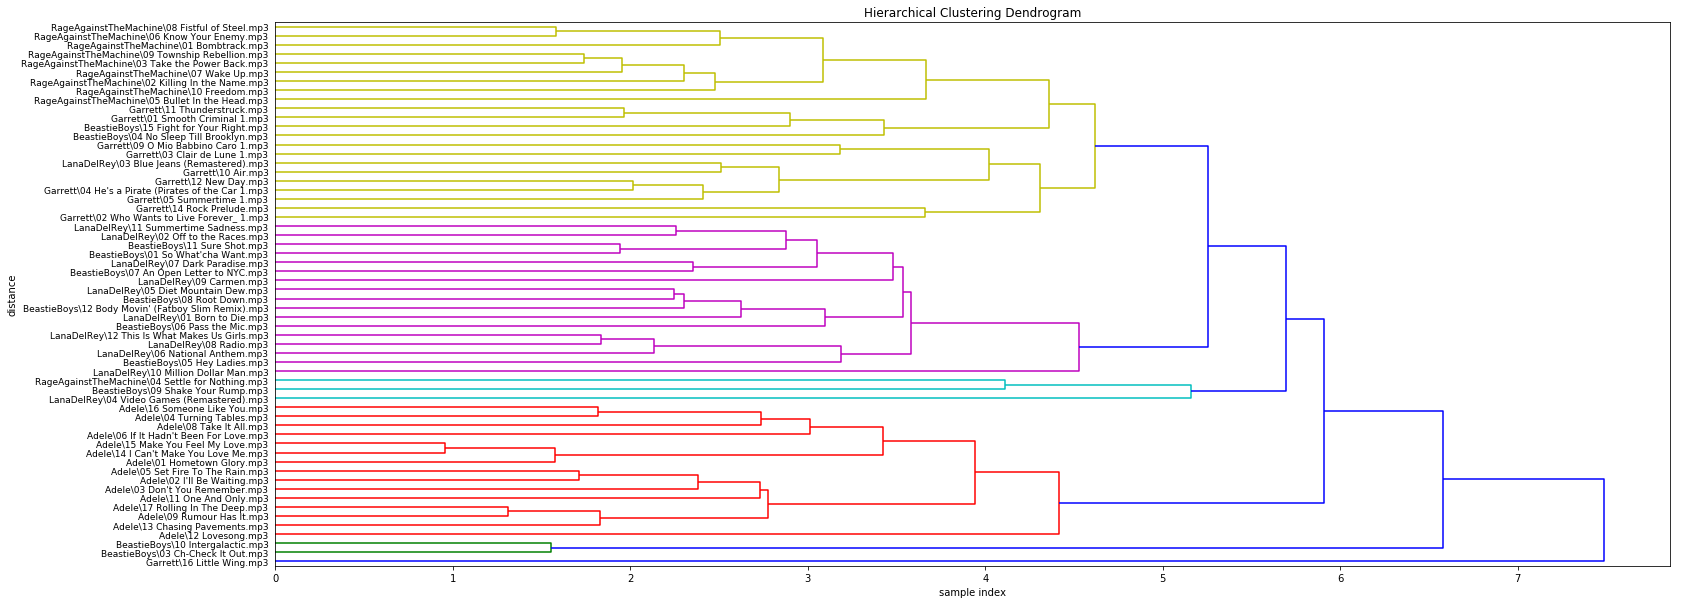

In [178]:
Z = linkage(X, "average")


plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_font_size=9.,
    labels=clusterLabel,
    orientation = 'right'
)
plt.show()

## Zu 3.

Da immer nur Teilsequenzen der einzelnen Songs verglichen werden, gibts es einige Ausreisser. Zum Beispiel gibt es einige Songs von Rage Against The Machine, die mit langen Intros anfangen oder generell etwas ruhiger beginnen. Das führt dazu, dass Songs wie "Bullet in the Head" oder "Settle for nothing" mit Lana del Ray oder den Beasty Boys geclustered werden. Das macht vielleicht für den Algorithmus sinn, für den Hörer allerdings besteht zwischen diesen Interpreten eine nur sehr geringe Ähnlichkeit. 

Ein Verbesserungsansatz wäre einen Klassifizierungsalgorithmus zu finden, der die Unterschiede innerhalb eines Liedes genauer in Betracht zieht, zum Beispiel in dem er explizit langsame Anfänge von Songs als Intros identifizieren kann, falls der Rest des Liedes einem komplett anderem Schema entspricht. Diese Intros könnten dann weniger Gewichtung in der Klassifizierung des Songs bekommen. 

Ein weiter Ansatz wäre, sofern diese Daten vorhanden sind, mit Hilfe eines Recommender Systems Lieder zu clustern die viele User gehört haben. Ähnlich wie der Spotify-Algorithmus, kann man Playlist nicht nur anhand der Ähnlichkeit der Lieder bestimmen, sondern auch basierend darauf, welche Songs andere User gehört haben, die diesen Song öfter hören.